# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
validation_file='./traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [2]:
import pandas as pd
import numpy as np

In [3]:
y_train.shape

(34799,)

In [4]:
y_data = {'ClassId' : y_train}
df = pd.DataFrame(y_data)
label_df = pd.DataFrame({'counts':  pd.value_counts(df['ClassId'])})

In [5]:
traffic_sign_df = pd.read_csv('./signnames.csv')
traffic_sign_df = pd.concat([traffic_sign_df, label_df], axis=1)
traffic_sign_df

,ClassId,SignName,counts
0,0,Speed limit (20km/h),180
1,1,Speed limit (30km/h),1980
2,2,Speed limit (50km/h),2010
3,3,Speed limit (60km/h),1260
4,4,Speed limit (70km/h),1770
5,5,Speed limit (80km/h),1650
6,6,End of speed limit (80km/h),360
7,7,Speed limit (100km/h),1290
8,8,Speed limit (120km/h),1260
9,9,No passing,1320


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [6]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = np.sum(traffic_sign_df['counts'].values)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [7]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

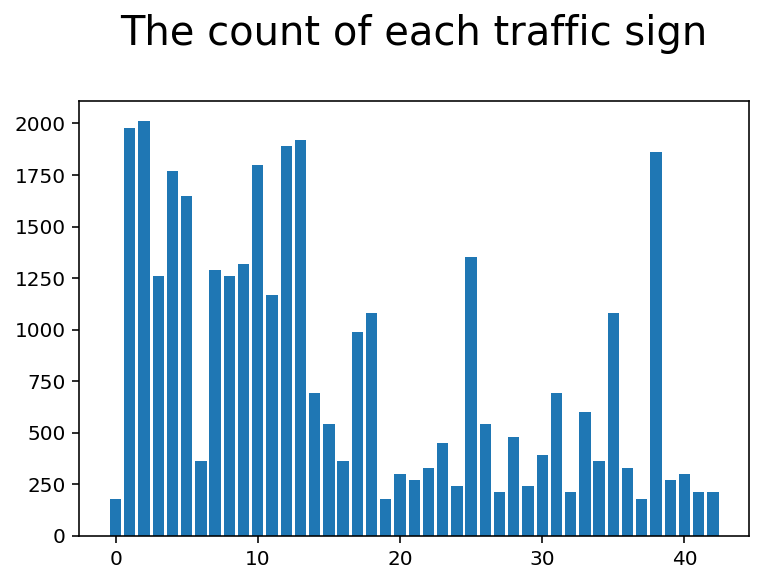

In [8]:
plt.bar(traffic_sign_df['ClassId'], traffic_sign_df['counts'])
plt.title('The count of each traffic sign', fontsize=20,y=1.1)
plt.savefig('./examples/counts_of_traffic_sign.png')

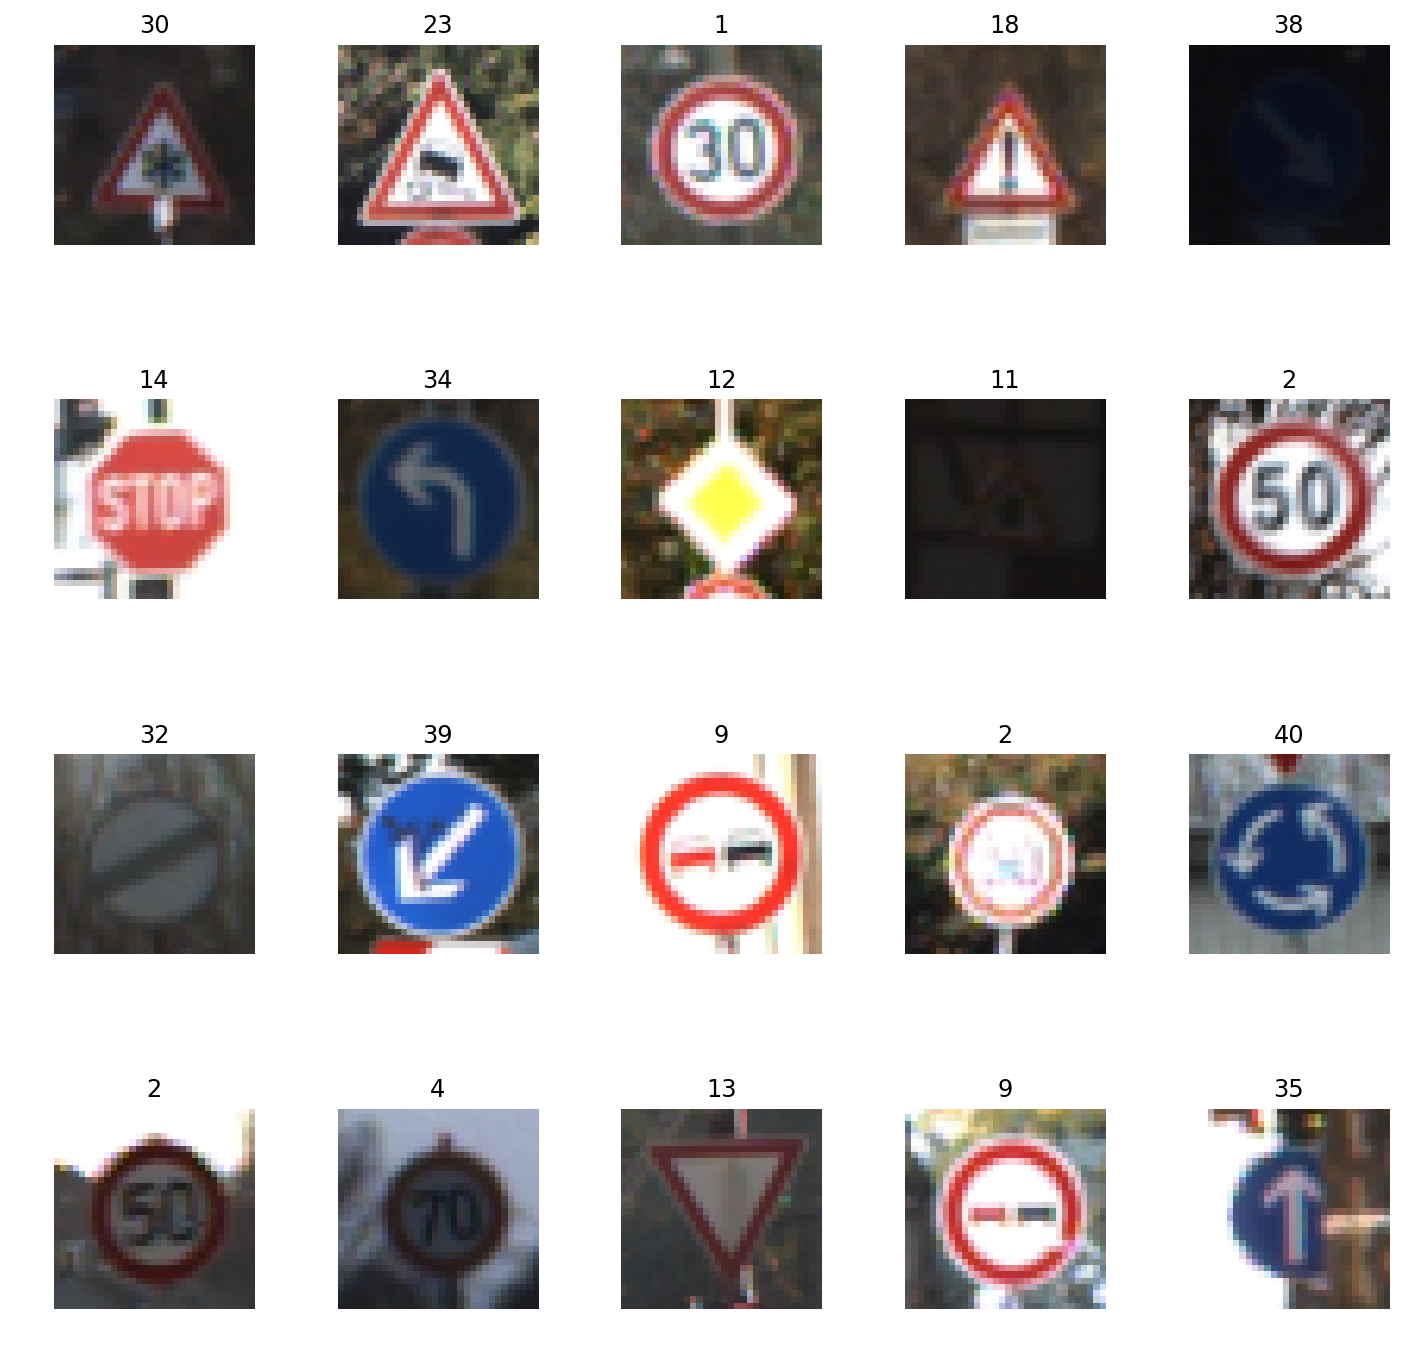

In [9]:
import random
fig, axis = plt.subplots(nrows=4, ncols=5, figsize=(10,10))
#fig.subplots_adjust(hspace = 0.5, wspace = 0.05)
fig.tight_layout()
for r in range(4):
    for c in range(5):
        index = random.randint(0, len(X_train))
        axis[r][c].imshow(X_train[index])
        axis[r][c].set_title(y_train[index])
        axis[r][c].set_axis_off()
fig.savefig('./examples/random_traffic_sign.png')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [10]:
import numpy as np
import tensorflow as tf
import cv2

In [11]:
# Normalize images
def normalize(x):
    return (x - 128.0) / 128

In [12]:
# Convert imgs to graycale
def grayscale(imgs):
    imgs_temp = np.zeros((imgs.shape[0], imgs.shape[1], imgs.shape[2], 1))
    for i in range(len(imgs)):
        imgs_temp[i] = cv2.cvtColor(imgs[i], cv2.COLOR_RGB2GRAY).reshape(imgs_temp.shape[1:])
    return imgs_temp

In [13]:
test_images = X_train[101:102]

In [14]:
gray_imgs = grayscale(test_images)
gray_img = gray_imgs[0,:,:,0]

In [15]:
gray_img.shape

(32, 32)

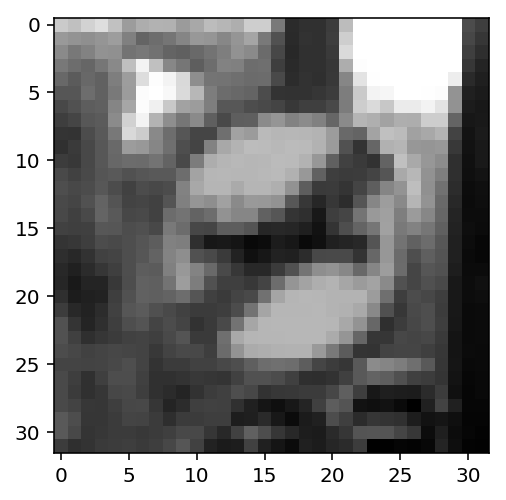

In [16]:
plt.imshow(gray_img, cmap='gray')

In [17]:
test_x = tf.placeholder(tf.float32, [None, 32,32,1])

In [18]:
# Converlution Layer
def conv_layer(X, conv_param, padding_mode='VALID'):
    mu = 0
    sigma = 0.1
    conv_kernel, output_k, conv_stride = conv_param
    pre_k = X.get_shape().as_list()[3]
    
    conv_w = tf.Variable(tf.truncated_normal([conv_kernel, conv_kernel, pre_k, output_k], mean=mu, stddev=sigma))
    conv_b = tf.Variable(tf.zeros(output_k))
    
    #conv = tf.nn.conv2d(x_tensor, conv_weight, strides=[1, *conv_strides, 1], padding='SAME')
    conv_layer = tf.nn.conv2d(X, conv_w, strides=[1, conv_stride, conv_stride, 1], padding=padding_mode) + conv_b
    conv_layer = tf.identity(conv_layer, name='conv_layer')
    print('conv_layer name:',conv_layer.name)
    return tf.nn.relu(conv_layer)

In [19]:
conv_layer(test_x, [5, 6, 1]).get_shape().as_list()

conv_layer name: conv_layer:0


[None, 28, 28, 6]

In [20]:
# Pooling Layer
def max_pool_layer(X, pool_param, padding_mode='VALID'):
    pool_kernel, pool_stride = pool_param
    layer_pool = tf.nn.max_pool(X, ksize=[1, pool_kernel, pool_kernel, 1], strides=[1, pool_stride, pool_stride, 1], \
                                padding=padding_mode)
    return layer_pool

In [21]:
max_pool_layer(test_x, [2,2]).get_shape().as_list()

[None, 16, 16, 1]

In [22]:
def flatten_layer(X):
    return tf.contrib.layers.flatten(X)

In [23]:
def fully_connect(X, keep_prob, num_output):
    mu = 0
    sigma = 0.1
    num_input = X.get_shape().as_list()[1]
    
    fc_w = tf.Variable(tf.truncated_normal([num_input, num_output], mean=mu, stddev=sigma))
    fc_b = tf.Variable(tf.zeros(num_output))
    
    fc_layer = tf.matmul(X, fc_w) + fc_b
    fc_layer = tf.nn.relu(fc_layer)
    
    output = tf.nn.dropout(fc_layer, keep_prob)
    return output

In [24]:
test_k = tf.placeholder(tf.float32)

In [25]:
fully_connect(flatten_layer(test_x), test_k, 6).get_shape()

TensorShape([Dimension(None), Dimension(6)])

In [26]:
def output_layer(X, n_classes):
    mu = 0
    sigma = 0.1
    num_input = X.get_shape().as_list()[1]
    
    weights = tf.Variable(tf.truncated_normal([num_input, n_classes], mean=mu, stddev=sigma))
    biases = tf.Variable(tf.zeros(n_classes))
    
    return tf.matmul(X, weights) + biases

### Model Architecture

In [27]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

#### LeNet

In [28]:
def LeNet(X, keep_prob, n_classes):
    fmp = [1, 1.414, 1.414, 1]
    #layer1 parameters
    layer1_conv_param = [5, 16, 1]
    layer1_pool_param = [2, 2]
    
    #layer2 parameters
    layer2_conv_param = [5, 32, 1]
    layer2_pool_param = [2, 2]
    
    #layer3 parameters
    layer3_num_output = 120
    
    layer4_num_output = 84
    
    #Layer1
    layer1 = conv_layer(X, layer1_conv_param)
    print('layer1_conv shape', layer1.get_shape())
    layer1 = max_pool_layer(layer1, layer1_pool_param)
    print('layer1_pool',layer1.get_shape())
    
    #Layer2
    layer2 = conv_layer(layer1, layer2_conv_param)
    print('layer2_conv shape', layer2.get_shape())
    layer2 = max_pool_layer(layer2, layer2_pool_param)
    print('layer2_pool shape',layer2.get_shape())
    #layer2 = tf.nn.fractional_max_pool(layer2, fmp)[0]
    
    layer2_flat = flatten_layer(layer2)
    print('layer2_flat shape',layer2_flat.get_shape())
    
    #Layer3
    layer3 = fully_connect(layer2_flat, keep_prob, layer3_num_output)
    print('layer3_fc shape',layer3.get_shape())
    
    #Layer4
    layer4 = fully_connect(layer3, keep_prob, layer4_num_output)
    
    #Output Layer
    output = output_layer(layer4, n_classes)
    print('output_layer shape',output.get_shape())
    
    return output

In [29]:
LeNet(test_x, test_k, n_classes)

conv_layer name: conv_layer_1:0
layer1_conv shape (?, 28, 28, 16)
layer1_pool (?, 14, 14, 16)
conv_layer name: conv_layer_2:0
layer2_conv shape (?, 10, 10, 32)
layer2_pool shape (?, 5, 5, 32)
layer2_flat shape (?, 800)
layer3_fc shape (?, 120)
output_layer shape (?, 43)


<tf.Tensor 'add_6:0' shape=(?, 43) dtype=float32>

In [30]:
def LeNet_E(X, keep_prob, n_classes):
    #layer1 parameters
    layer1_conv_param = [5, 16, 1]
    layer1_pool_param = [2, 2]
    
    #layer2 parameters
    layer2_conv_param = [5, 32, 1]
    layer2_pool_param = [2, 2]
    
    #layer3 parameters
    layer3_num_output = 258
    
    layer4_num_output = 128
    
    #Layer1
    layer1 = conv_layer(X, layer1_conv_param)
    print('layer1_conv shape', layer1.get_shape())
    layer1 = conv_layer(layer1, layer1_conv_param, padding_mode='SAME')
    print('layer1_conv shape', layer1.get_shape())
    layer1 = max_pool_layer(layer1, layer1_pool_param)
    print('layer1_pool',layer1.get_shape())
    
    #Layer2
    layer2 = conv_layer(layer1, layer2_conv_param)
    print('layer2_conv shape', layer2.get_shape())
    layer2 = conv_layer(layer2, layer2_conv_param, padding_mode='SAME')
    print('layer2_conv shape', layer2.get_shape())
    layer2 = max_pool_layer(layer2, layer2_pool_param)
    print('layer2_pool shape',layer2.get_shape())
    
    layer2_flat = flatten_layer(layer2)
    print('layer2_flat shape',layer2_flat.get_shape())
    
    layer2_flat = tf.nn.dropout(layer2_flat, keep_prob)
    
    #Layer3
    layer3 = fully_connect(layer2_flat, keep_prob, layer3_num_output)
    print('layer3_fc shape',layer3.get_shape())
    
    #Layer4
    layer4 = fully_connect(layer3, keep_prob, layer4_num_output)
    
    #Output Layer
    output = output_layer(layer4, n_classes)
    print('output_layer shape',output.get_shape())
    
    return output

In [31]:
LeNet_E(test_x, test_k, n_classes)

conv_layer name: conv_layer_3:0
layer1_conv shape (?, 28, 28, 16)
conv_layer name: conv_layer_4:0
layer1_conv shape (?, 28, 28, 16)
layer1_pool (?, 14, 14, 16)
conv_layer name: conv_layer_5:0
layer2_conv shape (?, 10, 10, 32)
conv_layer name: conv_layer_6:0
layer2_conv shape (?, 10, 10, 32)
layer2_pool shape (?, 5, 5, 32)
layer2_flat shape (?, 800)
layer3_fc shape (?, 258)
output_layer shape (?, 43)


<tf.Tensor 'add_13:0' shape=(?, 43) dtype=float32>

In [32]:
def LeNet2(X, keep_prob, n_classes):
    layer1_conv_param = [5, 6, 1]
    pool_param = [2, 2]
    layer2_conv1_param = [5, 16, 1]
    layer2_conv2_param = [5, 400,1]
    layer3_num_output = 256
    layer4_num_output = 128
    
    layer1 = conv_layer(X, layer1_conv_param)
    print('layer1   conv shape:',layer1.get_shape())
    layer1 = max_pool_layer(layer1, pool_param)
    print('layer1   pool shape:', layer1.get_shape())
    
    layer2_1 = conv_layer(layer1, layer2_conv1_param)
    print('layer2_1 conv shape:', layer2_1.get_shape())
    layer2_1 = max_pool_layer(layer2_1, pool_param)
    print('layer2_1 pool shape:', layer2_1.get_shape())
    layer2_1 = conv_layer(layer2_1, layer2_conv2_param)
    print('layer2_1 conv shape:', layer2_1.get_shape())
    layer2_1_flat = flatten_layer(layer2_1)
    print('layer2_1_flat shape', layer2_1_flat.get_shape())
    
    layer2_2_flat = flatten_layer(layer1)
    print('layer2_2_flat shape', layer2_2_flat.get_shape())
    
    layer2 = tf.concat_v2([layer2_1_flat, layer2_2_flat], 1)
    print('layer2 flat shape', layer2.get_shape())
    layer2 = tf.nn.dropout(layer2, keep_prob)
    
    layer3 = fully_connect(layer2, keep_prob, layer3_num_output)
    print('layer3 shape', layer3.get_shape())
    
    #layer4 = fully_connect(layer2, keep_prob, layer4_num_output)
    
    
    output = output_layer(layer3, n_classes)
    
    
    return output

In [33]:
LeNet2(test_x, test_k, n_classes)

conv_layer name: conv_layer_7:0
layer1   conv shape: (?, 28, 28, 6)
layer1   pool shape: (?, 14, 14, 6)
conv_layer name: conv_layer_8:0
layer2_1 conv shape: (?, 10, 10, 16)
layer2_1 pool shape: (?, 5, 5, 16)
conv_layer name: conv_layer_9:0
layer2_1 conv shape: (?, 1, 1, 400)
layer2_1_flat shape (?, 400)
layer2_2_flat shape (?, 1176)
layer2 flat shape (?, 1576)
layer3 shape (?, 256)


<tf.Tensor 'add_18:0' shape=(?, 43) dtype=float32>

## Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [34]:
from sklearn.utils import shuffle

In [35]:
X_train, y_train = shuffle(X_train, y_train)
X_norm_gray_train = normalize(grayscale(X_train))
X_norm_gray_valid = normalize(grayscale(X_valid))
X_norm_gray_test = normalize(grayscale(X_test))

In [36]:
import tensorflow as tf

In [37]:
import os

In [38]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, image_shape[0], image_shape[1], 1], name='X-input')
y = tf.placeholder(tf.int32, [None], name='y-label')
keep_prob = tf.placeholder(tf.float32, name='keep_prob')
one_hot_y = tf.one_hot(y, n_classes, name='one-hot-y')
#saver = tf.train.Saver()

### LeNet-5

In [39]:
if not os.path.exists('check_point_LeNet'):
    os.mkdir('check_point_LeNet')
LeNet_savefile = './check_point_LeNet/LE_check_point'

In [40]:
learning_rate = 0.005
BATCH_SIZE=128

logits = LeNet(X, keep_prob, n_classes)
logits = tf.identity(logits, name='lenet-logits')
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
accuracy_operation = tf.identity(accuracy_operation, name='lenet-accuracy')

conv_layer name: conv_layer:0
layer1_conv shape (?, 28, 28, 16)
layer1_pool (?, 14, 14, 16)
conv_layer name: conv_layer_1:0
layer2_conv shape (?, 10, 10, 32)
layer2_pool shape (?, 5, 5, 32)
layer2_flat shape (?, 800)
layer3_fc shape (?, 120)
output_layer shape (?, 43)


In [41]:
#model evaluate
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        # model accuracy_operation
        accuracy = sess.run(accuracy_operation, feed_dict={X: batch_x, y: batch_y, keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
    return (total_accuracy / num_examples)

In [42]:
def Train_LeNet(train_X_data, train_y_data, EPOCH=20, keep_prob_value=0.5):
    with tf.Session() as sess:
        saver = tf.train.Saver()
        sess.run(tf.global_variables_initializer())
        num_example = n_train
    
        train_loss = []
        print()
        print('Training...')
        for i in range(EPOCH):
            for offset in range(0, num_example, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = train_X_data[offset:end], train_y_data[offset:end]
                #model optimiaer
                sess.run(optimizer, feed_dict={X:batch_x, y:batch_y, keep_prob:keep_prob_value})
                #model cost
                loss = sess.run(cost, feed_dict={X:batch_x, y:batch_y, keep_prob:1})
                train_loss.append(loss)
            #model evaluate
            valid_accuracy = evaluate(X_norm_gray_valid, y_valid)
            if (i+1)%5 ==0:
                print('EPOCH {}...'.format(i+1))
                print('Validation Accuracy = {:.3f}'.format(valid_accuracy))
                print()
        #model savefile
        saver.save(sess, LeNet_savefile)
        print('Model saved!')
        
   
    with tf.Session() as sess:
        saver = tf.train.Saver()
        #model savefile
        saver.restore(sess, tf.train.latest_checkpoint('./check_point_LeNet/'))
        #model evaluate
        test_accuracy = evaluate(X_norm_gray_test, y_test)
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        
    plt.plot(train_loss, label='Train accuracy')
    plt.plot()
    plt.legend()
    _ = plt.ylim()
    plt.savefig('./examples/LeNet_acc.png')


Training...
EPOCH 5...
Validation Accuracy = 0.922

EPOCH 10...
Validation Accuracy = 0.928

EPOCH 15...
Validation Accuracy = 0.934

EPOCH 20...
Validation Accuracy = 0.924

EPOCH 25...
Validation Accuracy = 0.941

EPOCH 30...
Validation Accuracy = 0.937

EPOCH 35...
Validation Accuracy = 0.929

EPOCH 40...
Validation Accuracy = 0.939

EPOCH 45...
Validation Accuracy = 0.942

EPOCH 50...
Validation Accuracy = 0.938

Model saved!
Test Accuracy = 0.916


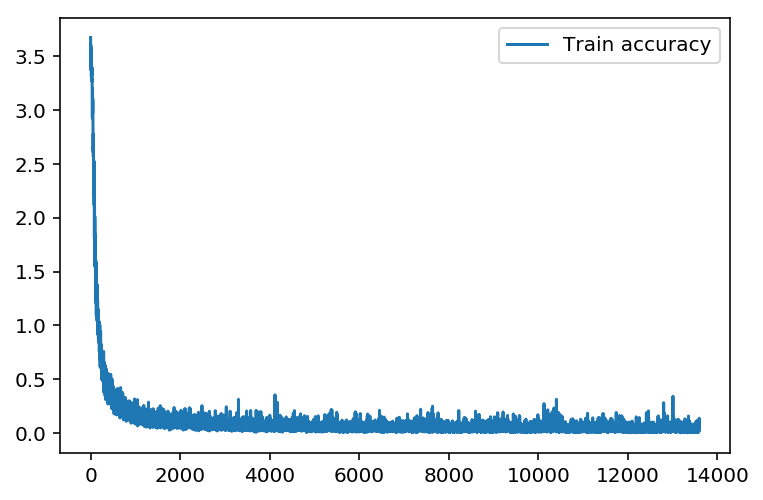

In [43]:
Train_LeNet(X_norm_gray_train, y_train, EPOCH=50)

### LeNet_E

In [44]:
if not os.path.exists('check_point_LeNet_E'):
    os.mkdir('check_point_LeNet_E')
LeNet_E_savefile = './check_point_LeNet_E/LNE_check_point'

In [45]:
LNE_learning_rate = 0.0003
BATCH_SIZE=128

LNE_logits = LeNet_E(X, keep_prob, n_classes)
LNE_logits = tf.identity(LNE_logits, name='LNE_logits')
LNE_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=LNE_logits)
LNE_cost = tf.reduce_mean(LNE_cross_entropy)
LNE_optimizer = tf.train.AdamOptimizer(learning_rate=LNE_learning_rate).minimize(LNE_cost)

LNE_correct_prediction = tf.equal(tf.argmax(LNE_logits, 1), tf.argmax(one_hot_y, 1))
LNE_accuracy_operation = tf.reduce_mean(tf.cast(LNE_correct_prediction, tf.float32))
LNE_accuracy_operation = tf.identity(LNE_accuracy_operation, name='LNE_accuracy')

conv_layer name: conv_layer_2:0
layer1_conv shape (?, 28, 28, 16)
conv_layer name: conv_layer_3:0
layer1_conv shape (?, 28, 28, 16)
layer1_pool (?, 14, 14, 16)
conv_layer name: conv_layer_4:0
layer2_conv shape (?, 10, 10, 32)
conv_layer name: conv_layer_5:0
layer2_conv shape (?, 10, 10, 32)
layer2_pool shape (?, 5, 5, 32)
layer2_flat shape (?, 800)
layer3_fc shape (?, 258)
output_layer shape (?, 43)


In [46]:
#model evaluate
def LNE_evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        # model accuracy_operation
        accuracy = sess.run(LNE_accuracy_operation, feed_dict={X: batch_x, y: batch_y, keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
    return (total_accuracy / num_examples)

In [47]:
def Train_LeNet_E(train_X_data, train_y_data, EPOCH=20, keep_prob_value=0.5):
    with tf.Session() as sess:
        saver = tf.train.Saver()
        sess.run(tf.global_variables_initializer())
        num_example = n_train
    
        train_loss = []
        print()
        print('Training...')
        for i in range(EPOCH):
            for offset in range(0, num_example, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = train_X_data[offset:end], train_y_data[offset:end]
                #model optimiaer
                sess.run(LNE_optimizer, feed_dict={X:batch_x, y:batch_y, keep_prob:keep_prob_value})
                #model cost
                loss = sess.run(LNE_cost, feed_dict={X:batch_x, y:batch_y, keep_prob:1})
                train_loss.append(loss)
            #model evaluate
            valid_accuracy = LNE_evaluate(X_norm_gray_valid, y_valid)
            if (i+1)%5 ==0:
                print('EPOCH {}...'.format(i+1))
                print('Validation Accuracy = {:.3f}'.format(valid_accuracy))
                print()
        #model savefile
        saver.save(sess, LeNet_E_savefile)
        print('Model saved!')
        
   
    with tf.Session() as sess:
        saver = tf.train.Saver()
        #model savefile
        saver.restore(sess, tf.train.latest_checkpoint('./check_point_LeNet_E/'))
        #model evaluate
        test_accuracy = LNE_evaluate(X_norm_gray_test, y_test)
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        
    plt.plot(train_loss, label='Train accuracy')
    plt.plot()
    plt.legend()
    _ = plt.ylim()
    plt.savefig('./examples/LeNet_E_acc.png')


Training...
EPOCH 5...
Validation Accuracy = 0.868

EPOCH 10...
Validation Accuracy = 0.952

EPOCH 15...
Validation Accuracy = 0.970

EPOCH 20...
Validation Accuracy = 0.971

EPOCH 25...
Validation Accuracy = 0.973

EPOCH 30...
Validation Accuracy = 0.978

EPOCH 35...
Validation Accuracy = 0.982

EPOCH 40...
Validation Accuracy = 0.983

EPOCH 45...
Validation Accuracy = 0.983

EPOCH 50...
Validation Accuracy = 0.986

Model saved!
Test Accuracy = 0.972


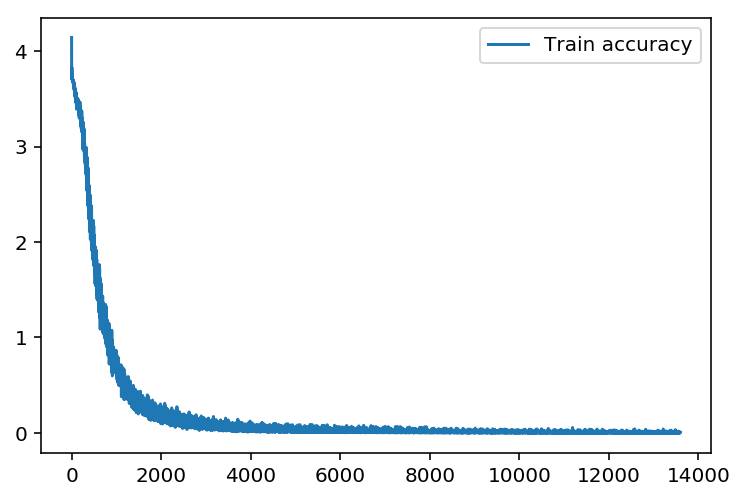

In [48]:
Train_LeNet_E(X_norm_gray_train, y_train, EPOCH=50)

### LeNet2

In [49]:
if not os.path.exists('check_point_LeNet2'):
    os.mkdir('check_point_LeNet2')
LeNet2_savefile = './check_point_LeNet2/LN2_model'

In [50]:
LN2_learning_rate = 0.0005
BATCH_SIZE=128

LN2_logits = LeNet2(X, keep_prob, n_classes)
LN2_logits = tf.identity(LN2_logits, name='LN2_logits')
LN2_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=LN2_logits)
LN2_cost = tf.reduce_mean(LN2_cross_entropy)
LN2_optimizer = tf.train.AdamOptimizer(learning_rate=LN2_learning_rate).minimize(LN2_cost)

LN2_correct_prediction = tf.equal(tf.argmax(LN2_logits, 1), tf.argmax(one_hot_y, 1))
LN2_accuracy_operation = tf.reduce_mean(tf.cast(LN2_correct_prediction, tf.float32))
LN2_accuracy_operation = tf.identity(LN2_accuracy_operation, name='LN2-accuracy')

conv_layer name: conv_layer_6:0
layer1   conv shape: (?, 28, 28, 6)
layer1   pool shape: (?, 14, 14, 6)
conv_layer name: conv_layer_7:0
layer2_1 conv shape: (?, 10, 10, 16)
layer2_1 pool shape: (?, 5, 5, 16)
conv_layer name: conv_layer_8:0
layer2_1 conv shape: (?, 1, 1, 400)
layer2_1_flat shape (?, 400)
layer2_2_flat shape (?, 1176)
layer2 flat shape (?, 1576)
layer3 shape (?, 256)


In [51]:
#model evaluate
def LN2_evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        # model accuracy_operation
        accuracy = sess.run(LN2_accuracy_operation, feed_dict={X: batch_x, y: batch_y, keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
    return (total_accuracy / num_examples)

In [52]:
def Train_LeNet2(train_X_data, train_y_data, EPOCH=50, keep_prob_value=0.5):
    with tf.Session() as sess:
        saver = tf.train.Saver()
        sess.run(tf.global_variables_initializer())
        num_example = n_train
    
        train_loss = []
        print()
        print('Training...')
        for i in range(EPOCH):
            for offset in range(0, num_example, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = train_X_data[offset:end], train_y_data[offset:end]
                #model optimiaer
                sess.run(LN2_optimizer, feed_dict={X:batch_x, y:batch_y, keep_prob:keep_prob_value})
                #model cost
                loss = sess.run(LN2_cost, feed_dict={X:batch_x, y:batch_y, keep_prob:1})
                train_loss.append(loss)
            #model evaluate
            valid_accuracy = LN2_evaluate(X_norm_gray_valid, y_valid)
            if (i+1)%5 ==0:
                print('EPOCH {}...'.format(i+1))
                print('Validation Accuracy = {:.3f}'.format(valid_accuracy))
                print()
        #model savefile
        saver.save(sess, LeNet2_savefile)
        print('Model saved!')
        
   
    with tf.Session() as sess:
        saver = tf.train.Saver()
        #model savefile
        saver.restore(sess, tf.train.latest_checkpoint('./check_point_LeNet2/'))
        #model evaluate
        test_accuracy = LN2_evaluate(X_norm_gray_test, y_test)
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        
    plt.plot(train_loss, label='Train accuracy')
    plt.plot()
    plt.legend()
    _ = plt.ylim()
    plt.savefig('./examples/LeNet2_acc.png')


Training...
EPOCH 5...
Validation Accuracy = 0.907

EPOCH 10...
Validation Accuracy = 0.935

EPOCH 15...
Validation Accuracy = 0.943

EPOCH 20...
Validation Accuracy = 0.951

EPOCH 25...
Validation Accuracy = 0.960

EPOCH 30...
Validation Accuracy = 0.963

EPOCH 35...
Validation Accuracy = 0.958

EPOCH 40...
Validation Accuracy = 0.958

EPOCH 45...
Validation Accuracy = 0.963

EPOCH 50...
Validation Accuracy = 0.968

Model saved!
Test Accuracy = 0.947


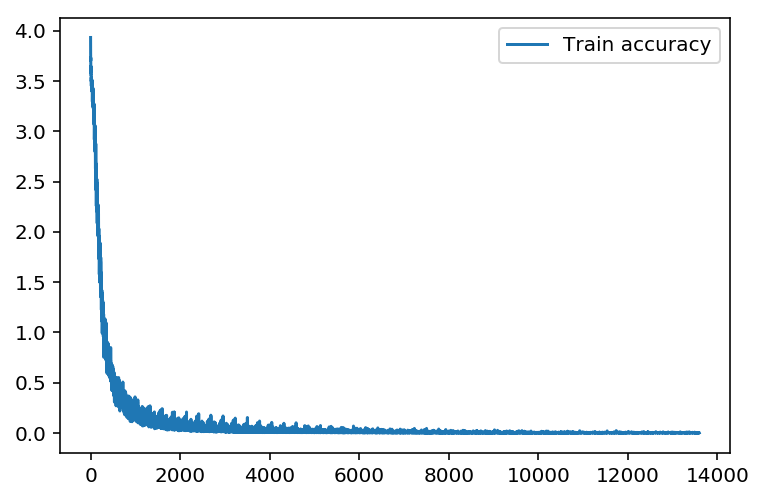

In [53]:
Train_LeNet2(X_norm_gray_train, y_train)

## Enhancement Data

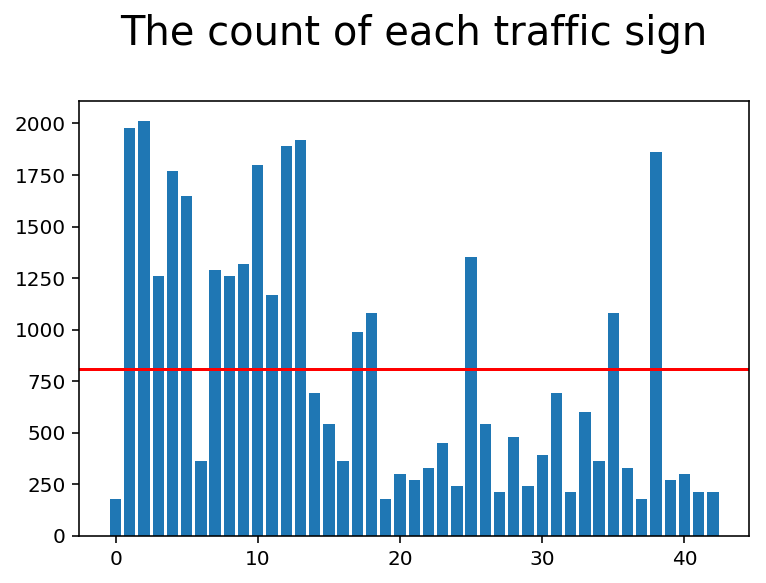

In [54]:
plt.bar(traffic_sign_df['ClassId'], traffic_sign_df['counts'])
plt.axhline(809,color='r')
plt.title('The count of each traffic sign', fontsize=20,y=1.1)
plt.savefig('./examples/counts_of_traffic_sign_an.png')

In [55]:
ave_dataset = np.mean(traffic_sign_df['counts'])
print('average data sets: {:0.3f}'.format(ave_dataset))

average data sets: 809.279


In [56]:
lack_df = traffic_sign_df[traffic_sign_df['counts'] < 809]

In [57]:
lack_df

,ClassId,SignName,counts
0,0,Speed limit (20km/h),180
6,6,End of speed limit (80km/h),360
14,14,Stop,690
15,15,No vehicles,540
16,16,Vehicles over 3.5 metric tons prohibited,360
19,19,Dangerous curve to the left,180
20,20,Dangerous curve to the right,300
21,21,Double curve,270
22,22,Bumpy road,330
23,23,Slippery road,450


In [58]:
len(lack_df)

26

In [59]:
lack_dClassId = lack_df['ClassId'].values

In [60]:
lack_dClassId

array([ 0,  6, 14, 15, 16, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31,
       32, 33, 34, 36, 37, 39, 40, 41, 42])

There are 26 data sets need to enchancement

In [61]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [62]:
datagen = ImageDataGenerator(rotation_range= 5,\
                             width_shift_range=0.1,\
                             height_shift_range=0.1,\
                             zoom_range=0.2,\
                             fill_mode = 'reflect')

In [63]:
X_origin_train, y_origin_train = train['features'], train['labels']
X_origin_train.shape

(34799, 32, 32, 3)

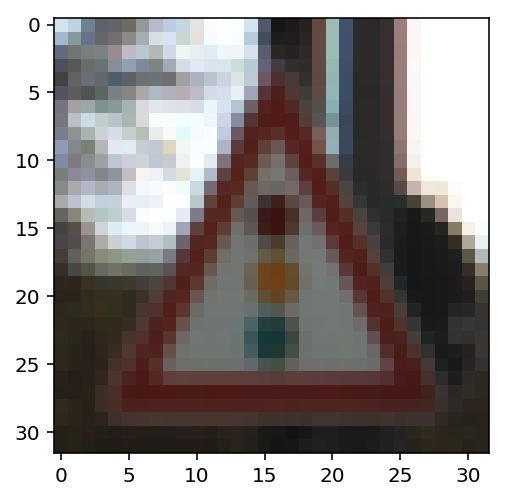

In [67]:
rand_index = random.randint(1, len(X_origin_train))
test_img = X_origin_train[rand_index: (rand_index+1)]
test_img.shape
plt.imshow(test_img[0])
plt.savefig('./examples/rand_image_org.png')

In [68]:
gen_imgs = datagen.flow(test_img, batch_size=1)

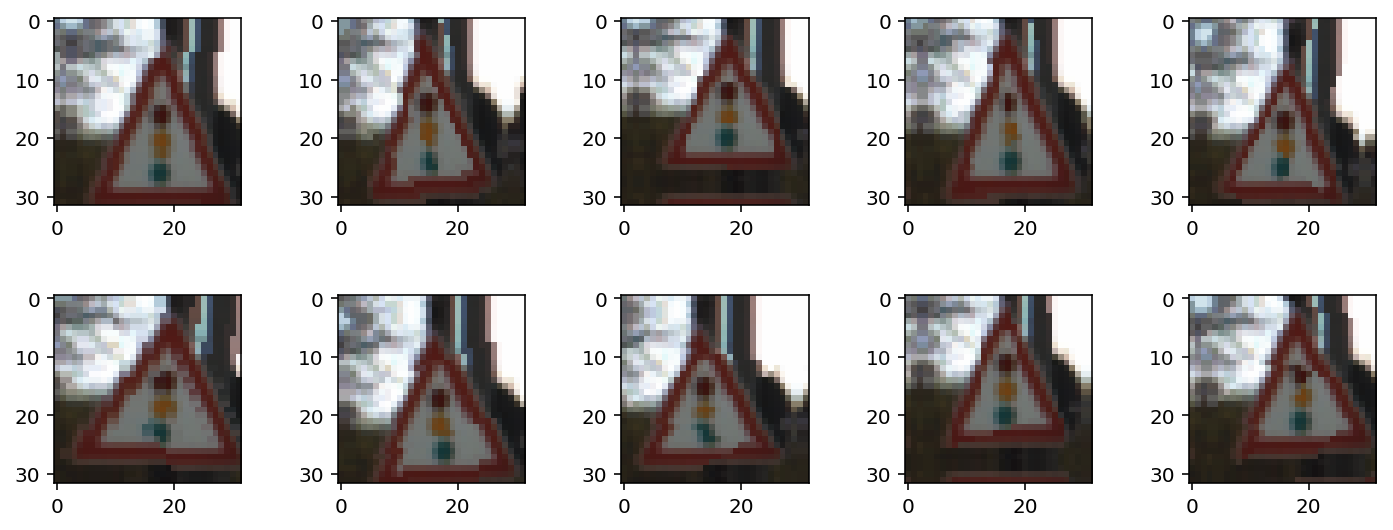

In [69]:
fig, axis = plt.subplots(nrows=2, ncols=5, figsize = (10,4))
fig.tight_layout()
for r in range(2):
    for c in range(5):
        test_x_batch = next(gen_imgs)
        axis[r][c].imshow(test_x_batch[0]/256)
fig.savefig('./examples/rand_gen_images.png')    

In [70]:
X_gray_data = grayscale(X_origin_train)
X_gray_data.shape

(34799, 32, 32, 1)

In [71]:
rand_index = random.randint(1, len(X_origin_train))
gray_img = X_gray_data[rand_index:rand_index+1]
gen_gray_imgs = datagen.flow(gray_img, batch_size=1)
gray_img.shape

(1, 32, 32, 1)

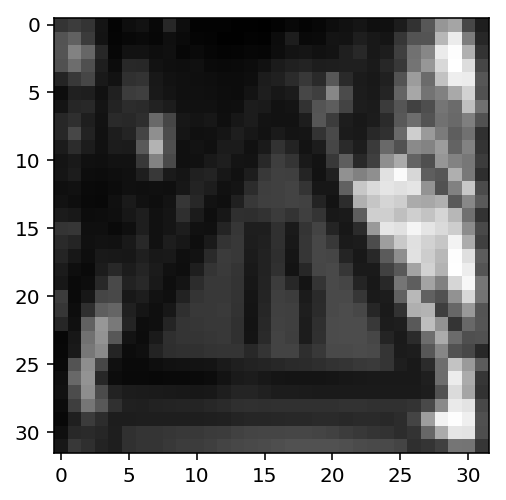

In [72]:
plt.imshow(gray_img[0][:,:,0], cmap='gray')

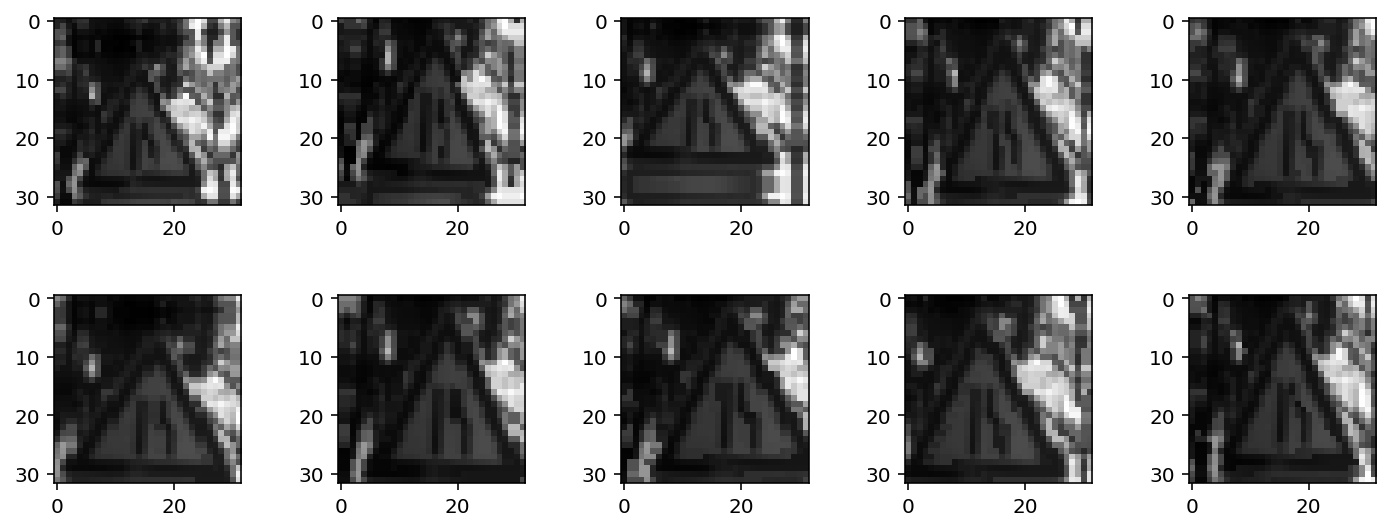

In [73]:
fig, axis = plt.subplots(nrows=2, ncols=5, figsize = (10,4))
fig.tight_layout()
for r in range(2):
    for c in range(5):
        test_x_batch = next(gen_gray_imgs)
        axis[r][c].imshow(test_x_batch[0][:,:,0], cmap='gray')
  

## Augment Datasets

In [74]:
classid_indices = []
for i in range(n_classes):
    indices = np.where(y_origin_train == i)[0]
    classid_indices.append([np.min(indices), np.max(indices)])

In [75]:
classid_indices

[[9960, 10139],
 [2220, 4199],
 [31439, 33448],
 [5370, 6629],
 [6810, 8579],
 [12360, 14009],
 [21450, 21809],
 [23730, 25019],
 [15870, 17129],
 [11040, 12359],
 [17130, 18929],
 [8580, 9749],
 [27329, 29218],
 [21810, 23729],
 [29219, 29908],
 [29909, 30448],
 [5010, 5369],
 [30449, 31438],
 [20370, 21449],
 [6630, 6809],
 [25950, 26249],
 [25680, 25949],
 [4500, 4829],
 [1770, 2219],
 [10800, 11039],
 [33449, 34798],
 [1230, 1769],
 [10350, 10559],
 [26849, 27328],
 [10560, 10799],
 [25020, 25409],
 [210, 899],
 [10140, 10349],
 [26250, 26848],
 [20010, 20369],
 [18930, 20009],
 [900, 1229],
 [4830, 5009],
 [14010, 15869],
 [25410, 25679],
 [4200, 4499],
 [0, 209],
 [9750, 9959]]

In [76]:
def generator(classid):
    
    data_x, data_y = X_gray_data[classid_indices[classid][0]:classid_indices[classid][1]+1],\
                     y_origin_train[classid_indices[classid][0]:classid_indices[classid][1]+1]

    batch_size = len(data_x)    
    if batch_size < 809:
        epo = int(809 / batch_size)
        tiny_batch = (809 % batch_size)
        gen_img_tiny_batch = datagen.flow(data_x, data_y, batch_size=tiny_batch, shuffle=False)
        gen_img_full_batch = datagen.flow(data_x, data_y, batch_size=batch_size, shuffle=False)
        if (epo == 1):
            #tiny_batch = (809 % batch_size)
            gen_data_x, gen_data_y = next(gen_img_tiny_batch)
            New_data_x = np.concatenate((data_x, gen_data_x), 0)
            New_data_y = np.concatenate((data_y, gen_data_y), 0)
        else:
            New_data_x, New_data_y = data_x, data_y
            for i in range(epo - 1):
                gen_data_x,gen_data_y = next(gen_img_full_batch)
                New_data_x = np.concatenate((New_data_x, gen_data_x), 0)
                New_data_y = np.concatenate((New_data_y, gen_data_y), 0)
            gen_data_x, gen_data_y = next(gen_img_tiny_batch)
            New_data_x = np.concatenate((New_data_x, gen_data_x), 0)
            New_data_y = np.concatenate((New_data_y, gen_data_y), 0)
        
        return New_data_x, New_data_y
    else:
        return data_x, data_y

In [77]:
test_x, test_y = generator(0)
print('ClassId {} data: X shape: {}, y shape: {}'.format(0, test_x.shape, test_y.shape))

ClassId 0 data: X shape: (809, 32, 32, 1), y shape: (809,)


In [78]:
New_X_data, New_y_data = generator(0)
print('The number of ClassId{}: {}'.format(0, len(New_X_data)))

for i in range(1, 43):
    temp_X_data, temp_y_data = generator(i)
    print('The number of ClassId{}: {}'.format(i, len(temp_X_data)))
    New_X_data, New_y_data = np.concatenate((New_X_data, temp_X_data), 0),\
                             np.concatenate((New_y_data, temp_y_data), 0)
print('Total numbers of New_x_data: {}'.format(len(New_X_data)))

The number of ClassId0: 809
The number of ClassId1: 1980
The number of ClassId2: 2010
The number of ClassId3: 1260
The number of ClassId4: 1770
The number of ClassId5: 1650
The number of ClassId6: 809
The number of ClassId7: 1290
The number of ClassId8: 1260
The number of ClassId9: 1320
The number of ClassId10: 1800
The number of ClassId11: 1170
The number of ClassId12: 1890
The number of ClassId13: 1920
The number of ClassId14: 809
The number of ClassId15: 809
The number of ClassId16: 809
The number of ClassId17: 990
The number of ClassId18: 1080
The number of ClassId19: 809
The number of ClassId20: 809
The number of ClassId21: 809
The number of ClassId22: 809
The number of ClassId23: 809
The number of ClassId24: 809
The number of ClassId25: 1350
The number of ClassId26: 809
The number of ClassId27: 809
The number of ClassId28: 809
The number of ClassId29: 809
The number of ClassId30: 809
The number of ClassId31: 809
The number of ClassId32: 809
The number of ClassId33: 809
The number

In [79]:
check_classid_indices = []
for i in range(n_classes):
    indices = np.where(New_y_data == i)[0]
    check_classid_indices.append([np.min(indices), np.max(indices)])

In [80]:
check_classid_indices

[[0, 808],
 [809, 2788],
 [2789, 4798],
 [4799, 6058],
 [6059, 7828],
 [7829, 9478],
 [9479, 10287],
 [10288, 11577],
 [11578, 12837],
 [12838, 14157],
 [14158, 15957],
 [15958, 17127],
 [17128, 19017],
 [19018, 20937],
 [20938, 21746],
 [21747, 22555],
 [22556, 23364],
 [23365, 24354],
 [24355, 25434],
 [25435, 26243],
 [26244, 27052],
 [27053, 27861],
 [27862, 28670],
 [28671, 29479],
 [29480, 30288],
 [30289, 31638],
 [31639, 32447],
 [32448, 33256],
 [33257, 34065],
 [34066, 34874],
 [34875, 35683],
 [35684, 36492],
 [36493, 37301],
 [37302, 38110],
 [38111, 38919],
 [38920, 39999],
 [40000, 40808],
 [40809, 41617],
 [41618, 43477],
 [43478, 44286],
 [44287, 45095],
 [45096, 45904],
 [45905, 46713]]

In [81]:
X_data_norm = normalize(New_X_data)

In [82]:
X_data_new, y_data_new = shuffle(X_data_norm, New_y_data)
X_data_new.shape

(46714, 32, 32, 1)

## Training


Training...
EPOCH 5...
Validation Accuracy = 0.924

EPOCH 10...
Validation Accuracy = 0.932

EPOCH 15...
Validation Accuracy = 0.916

EPOCH 20...
Validation Accuracy = 0.955

EPOCH 25...
Validation Accuracy = 0.954

EPOCH 30...
Validation Accuracy = 0.943

EPOCH 35...
Validation Accuracy = 0.952

EPOCH 40...
Validation Accuracy = 0.950

EPOCH 45...
Validation Accuracy = 0.914

EPOCH 50...
Validation Accuracy = 0.941

Model saved!
Test Accuracy = 0.905


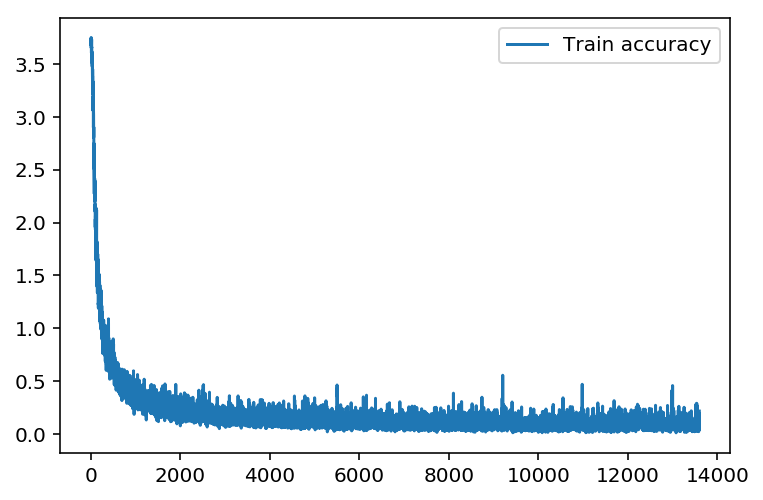

In [83]:
Train_LeNet(X_data_new, y_data_new, EPOCH=50)


Training...
EPOCH 5...
Validation Accuracy = 0.824

EPOCH 10...
Validation Accuracy = 0.939

EPOCH 15...
Validation Accuracy = 0.959

EPOCH 20...
Validation Accuracy = 0.971

EPOCH 25...
Validation Accuracy = 0.973

EPOCH 30...
Validation Accuracy = 0.978

EPOCH 35...
Validation Accuracy = 0.978

EPOCH 40...
Validation Accuracy = 0.987

EPOCH 45...
Validation Accuracy = 0.985

EPOCH 50...
Validation Accuracy = 0.981

Model saved!
Test Accuracy = 0.966


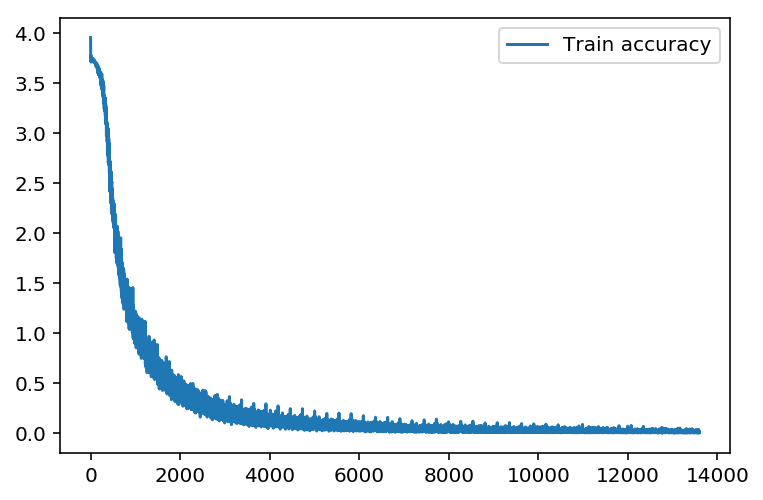

In [84]:
#def Train_LeNet_E(train_X_data, train_y_data):
Train_LeNet_E(X_data_new, y_data_new, EPOCH=50)


Training...
EPOCH 5...
Validation Accuracy = 0.892

EPOCH 10...
Validation Accuracy = 0.927

EPOCH 15...
Validation Accuracy = 0.928

EPOCH 20...
Validation Accuracy = 0.940

EPOCH 25...
Validation Accuracy = 0.941

EPOCH 30...
Validation Accuracy = 0.944

EPOCH 35...
Validation Accuracy = 0.952

EPOCH 40...
Validation Accuracy = 0.946

EPOCH 45...
Validation Accuracy = 0.953

EPOCH 50...
Validation Accuracy = 0.951

Model saved!
Test Accuracy = 0.946


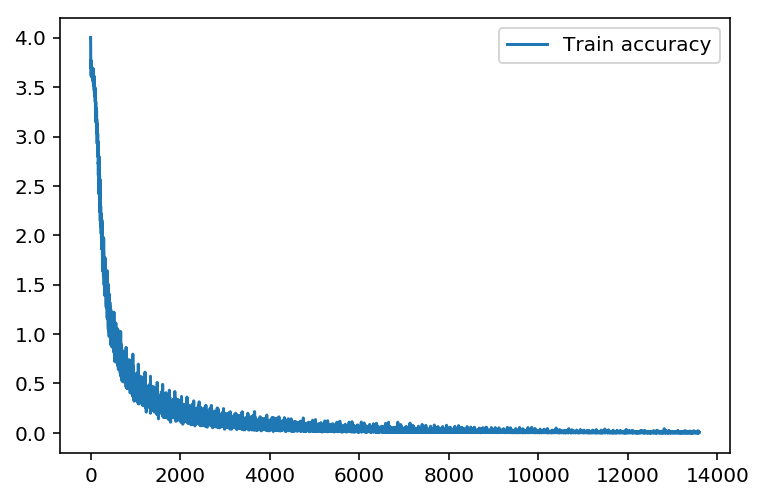

In [85]:
Train_LeNet2(X_data_new, y_data_new, EPOCH=50)

In [86]:
# Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

## Plot test prediction

In [87]:
tensor_names = ['LNE_logits:0', 'LNE_accuracy:0']

In [88]:
n_sample = 10
n_top_probability = 4
random_indices = np.random.randint(0, len(X_test), size=(n_sample))

In [89]:
def test_model(savefile, tensor_names, random_indices):
    load_graph = tf.Graph()
    with tf.Session(graph=load_graph) as sess:
        loader = tf.train.import_meta_graph(savefile + '.meta')
        loader.restore(sess, savefile)
        
        #Tensor loaded
        loaded_x = load_graph.get_tensor_by_name('X-input:0')
        loaded_y = load_graph.get_tensor_by_name('y-label:0')
        loaded_keep_prob = load_graph.get_tensor_by_name('keep_prob:0')
        #####
        loaded_logits = load_graph.get_tensor_by_name(tensor_names[0])
        loaded_accuracy = load_graph.get_tensor_by_name(tensor_names[1])
        
        
        #random_imgs = np.array(X_test[i] for i in indices)
        
        random_x = np.array([X_norm_gray_test[i] for i in random_indices])
        random_y = np.array([y_test[i] for i in random_indices])
        
        prediction = tf.nn.softmax(loaded_logits)
        top_k = tf.nn.top_k(prediction, n_top_probability)
        random_test_prediction = sess.run(top_k, feed_dict={
            loaded_x:random_x, loaded_y:random_y, loaded_keep_prob:1})
        return random_indices,random_test_prediction

In [90]:
def plot_pred(indices, prediction, plot_img_path_name):
    signName = traffic_sign_df['SignName'].values
    ind = np.arange(n_top_probability)
    margin = 0.5
    width = 0.5
    
    fig, axies = plt.subplots(nrows=n_sample, ncols=2, figsize=(20,1.5*n_sample))
    fig.tight_layout()
    fig.suptitle('Softmax Predictions', fontsize=20, y=1.1)
    
    for i in range(n_sample):
        pred_values = prediction.values[i]
        correct_name = signName[y_test[indices[i]]]
        pred_names = [signName[ids] for ids in prediction.indices[i]]
        
        axies[i][0].imshow(X_test[indices[i]])
        axies[i][0].set_title(correct_name)
        axies[i][0].set_axis_off()
        
        axies[i][1].barh(ind + margin, pred_values[::-1], width)
        axies[i][1].set_yticks(ind + margin)
        axies[i][1].set_yticklabels(pred_names[::-1])
        axies[i][1].set_xticks([0, 0.5, 1.0])
    fig.savefig(plot_img_path_name)
    

In [91]:
LNE_indices, LNE_prediction = test_model(LeNet_E_savefile, tensor_names, random_indices)

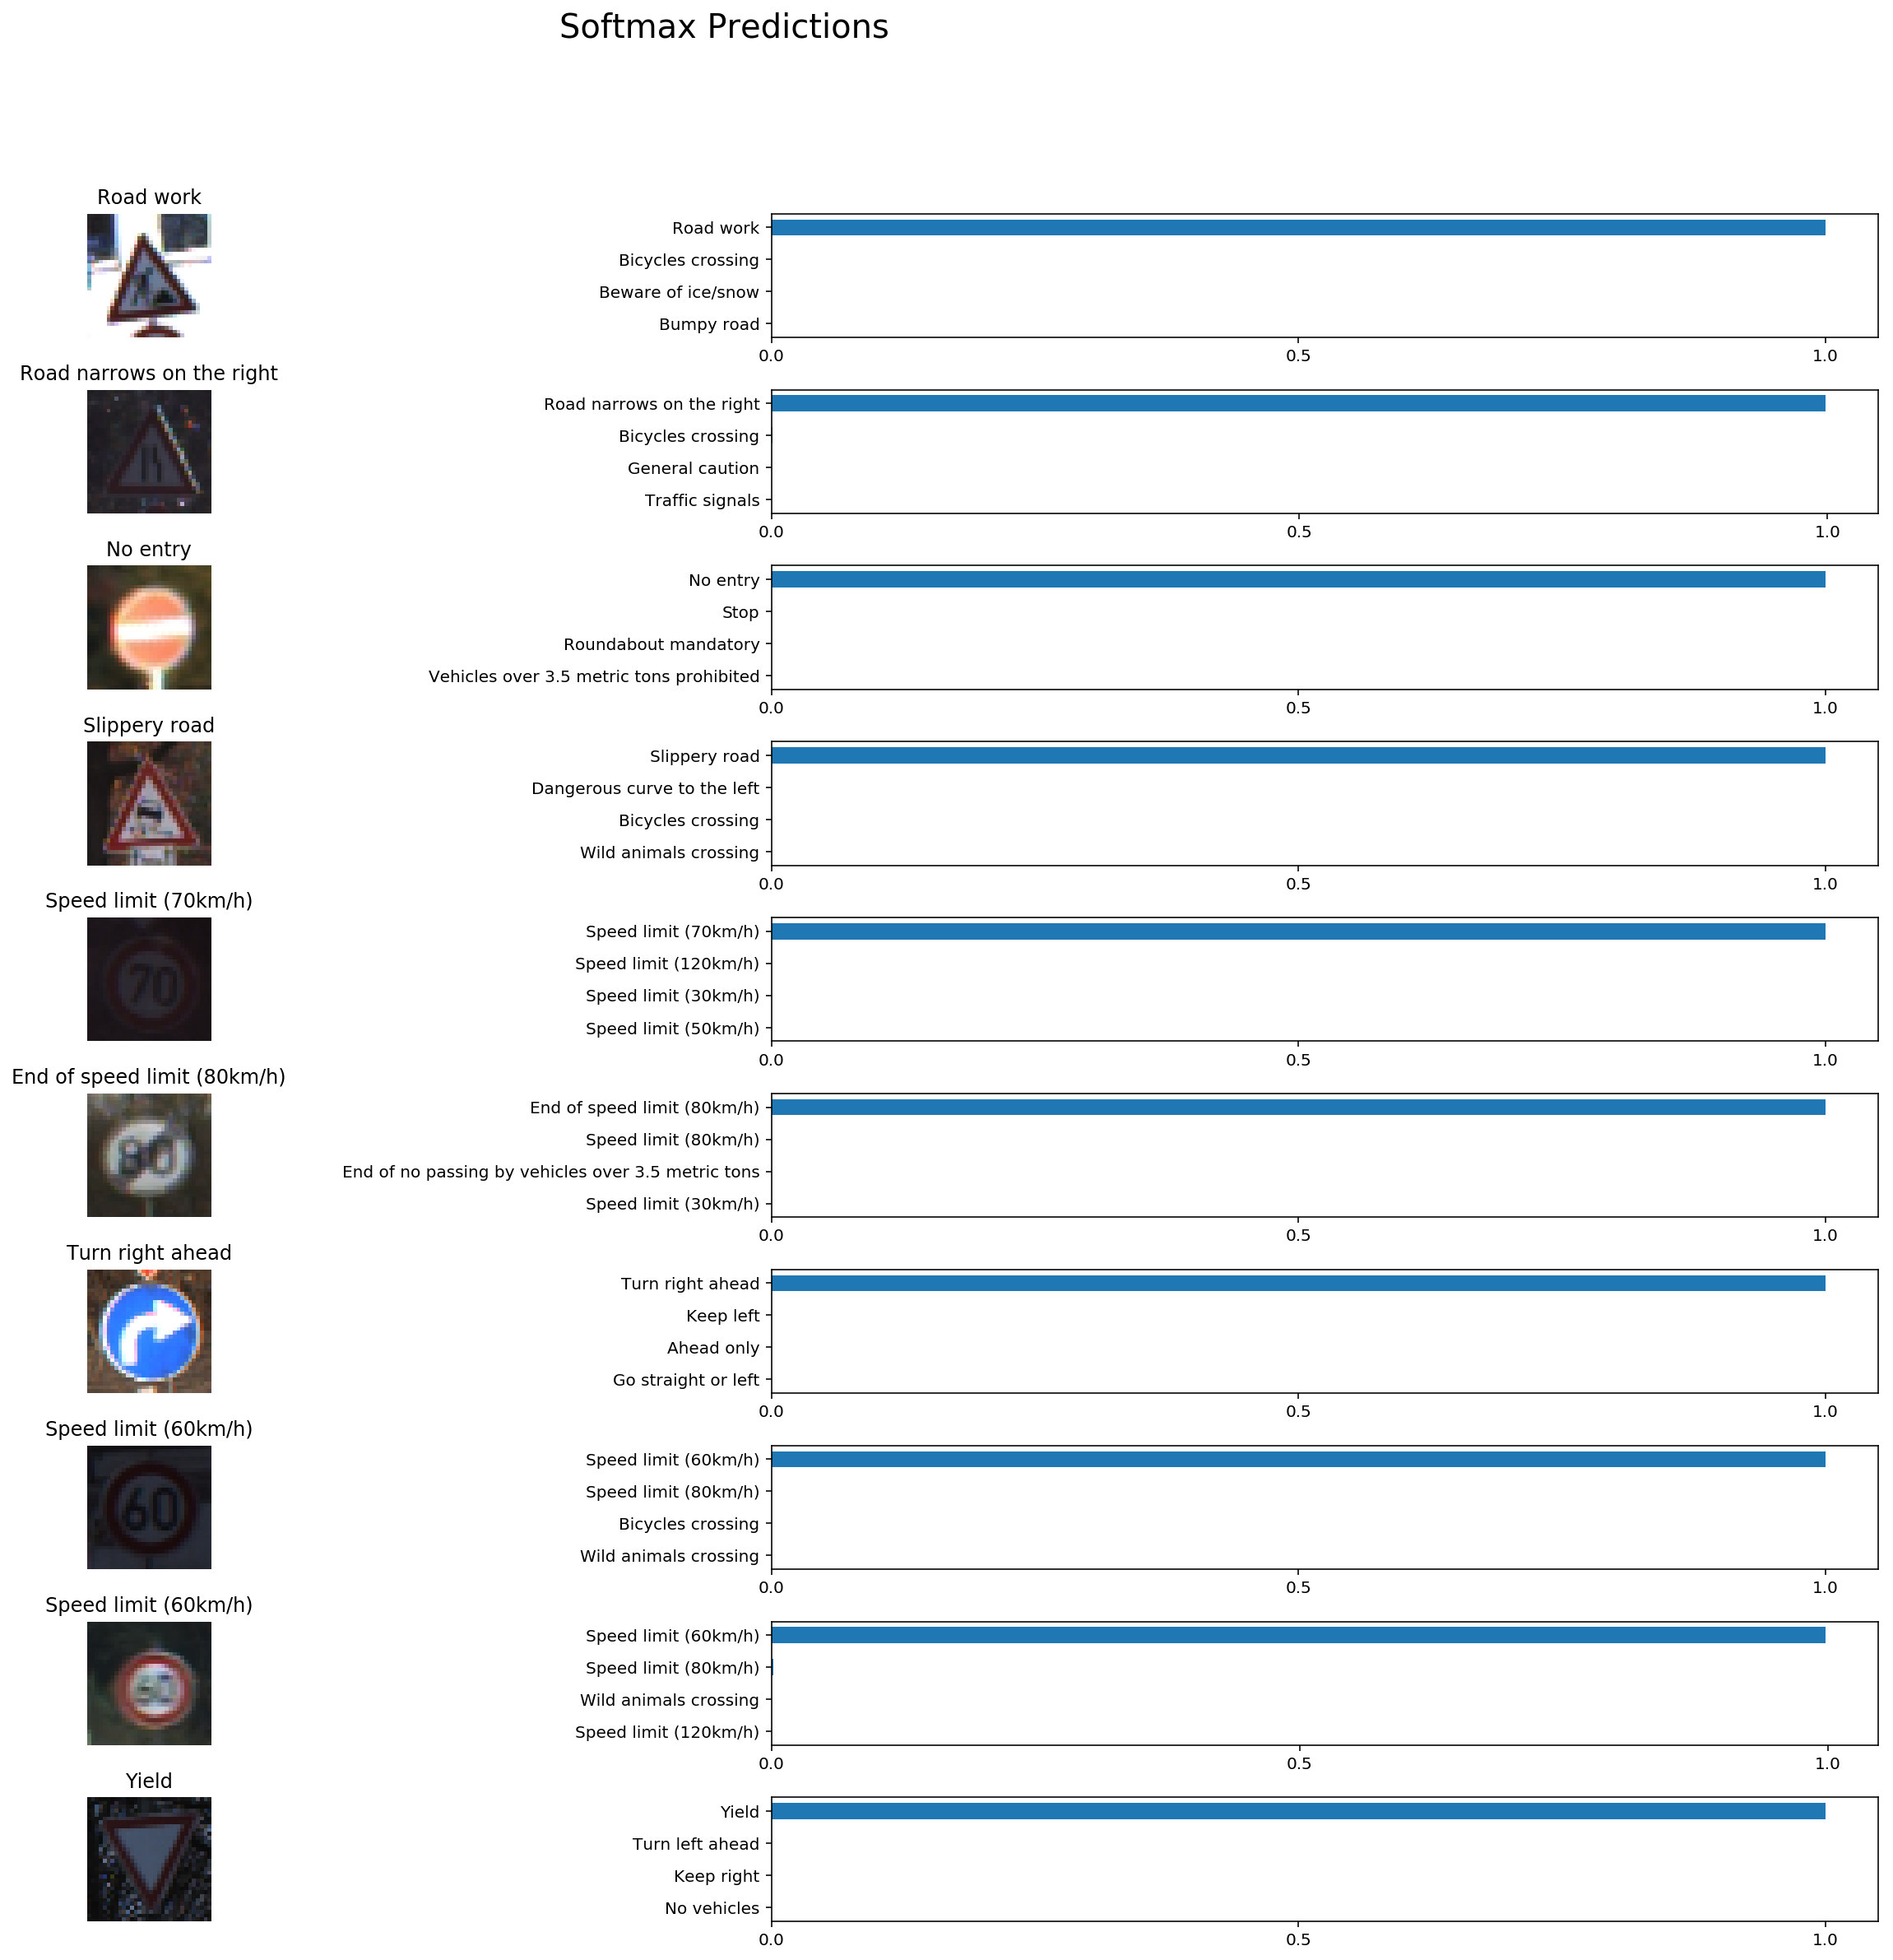

In [92]:
LNE_path_name = './examples/plot_LNE_pred.png'
plot_pred(LNE_indices, LNE_prediction, LNE_path_name)

### Plot LeNet Prediction

In [93]:
LN_tensor_names = ['lenet-logits:0','lenet-accuracy:0']

In [94]:
LN_indices, LN_prediction = test_model(LeNet_savefile, LN_tensor_names, random_indices)

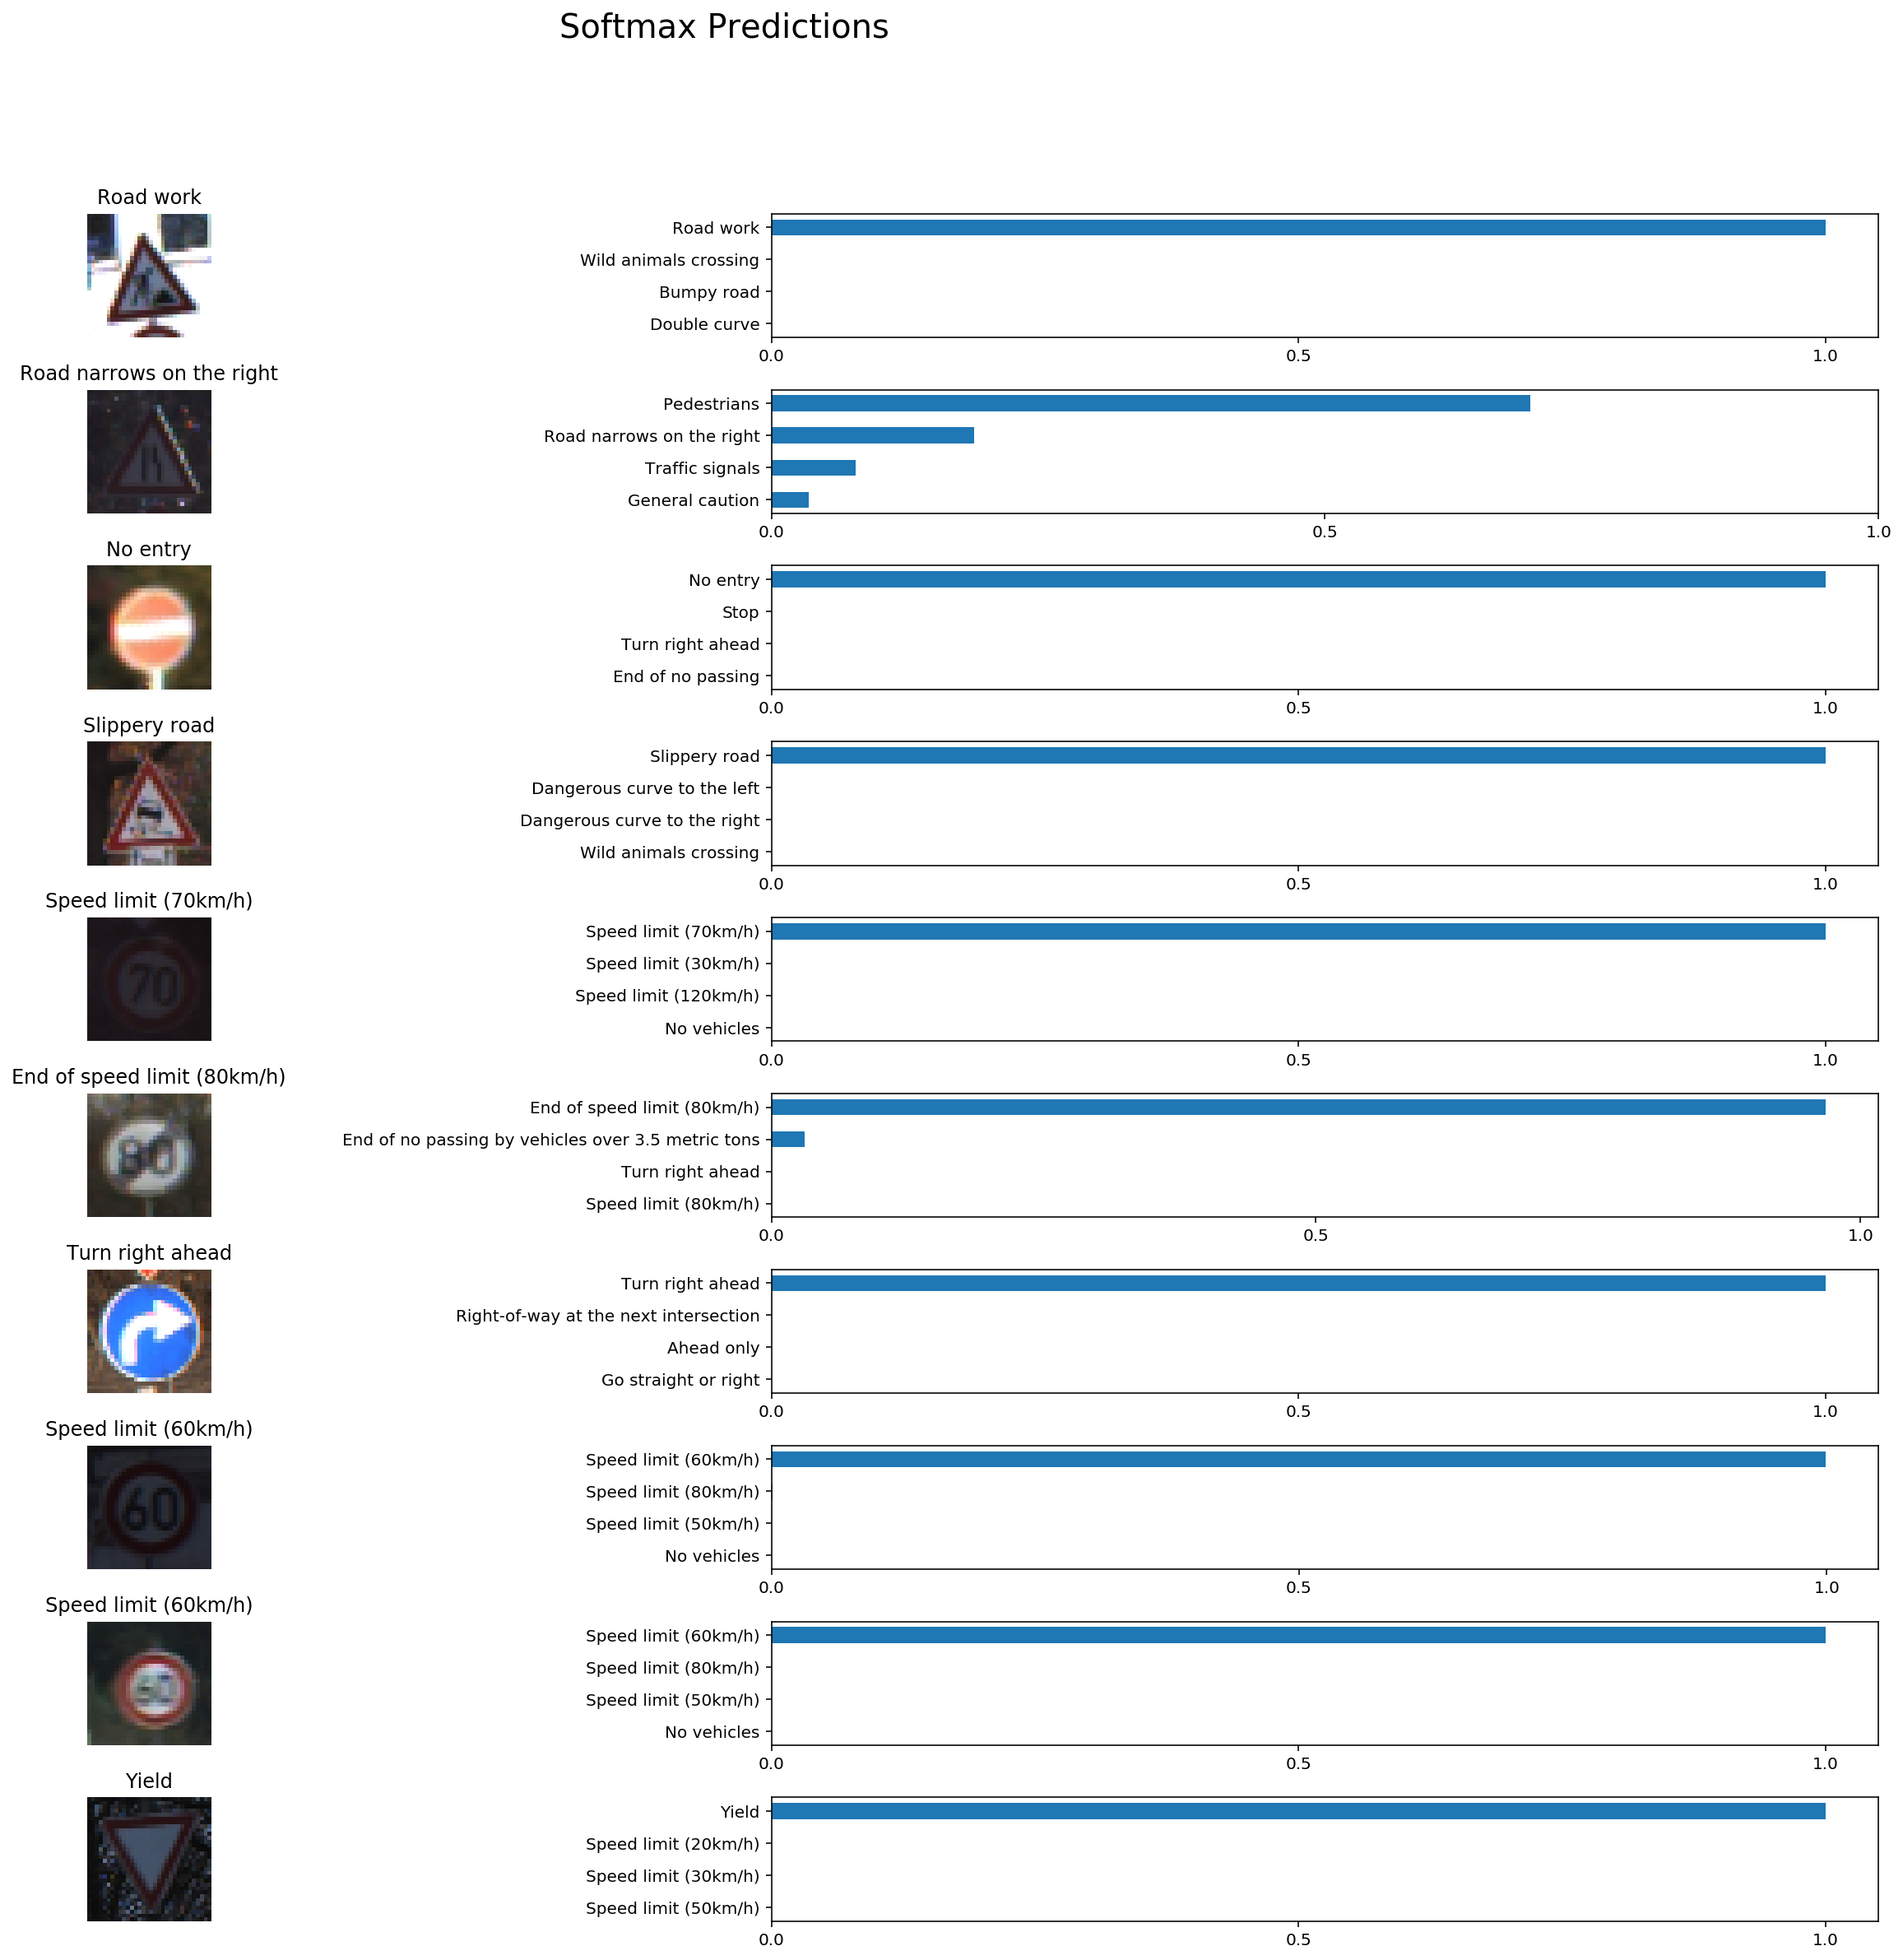

In [95]:
LN_path_name = './examples/plot_LN_pred.png'
plot_pred(LN_indices, LN_prediction, LN_path_name)

In [96]:
LN2_logits.name

'LN2_logits:0'

In [97]:
LN2_tensor_names = [LN2_logits.name, LN2_accuracy_operation.name]

In [98]:
LN2_indices, LN2_prediction = test_model(LeNet2_savefile, LN2_tensor_names, random_indices)

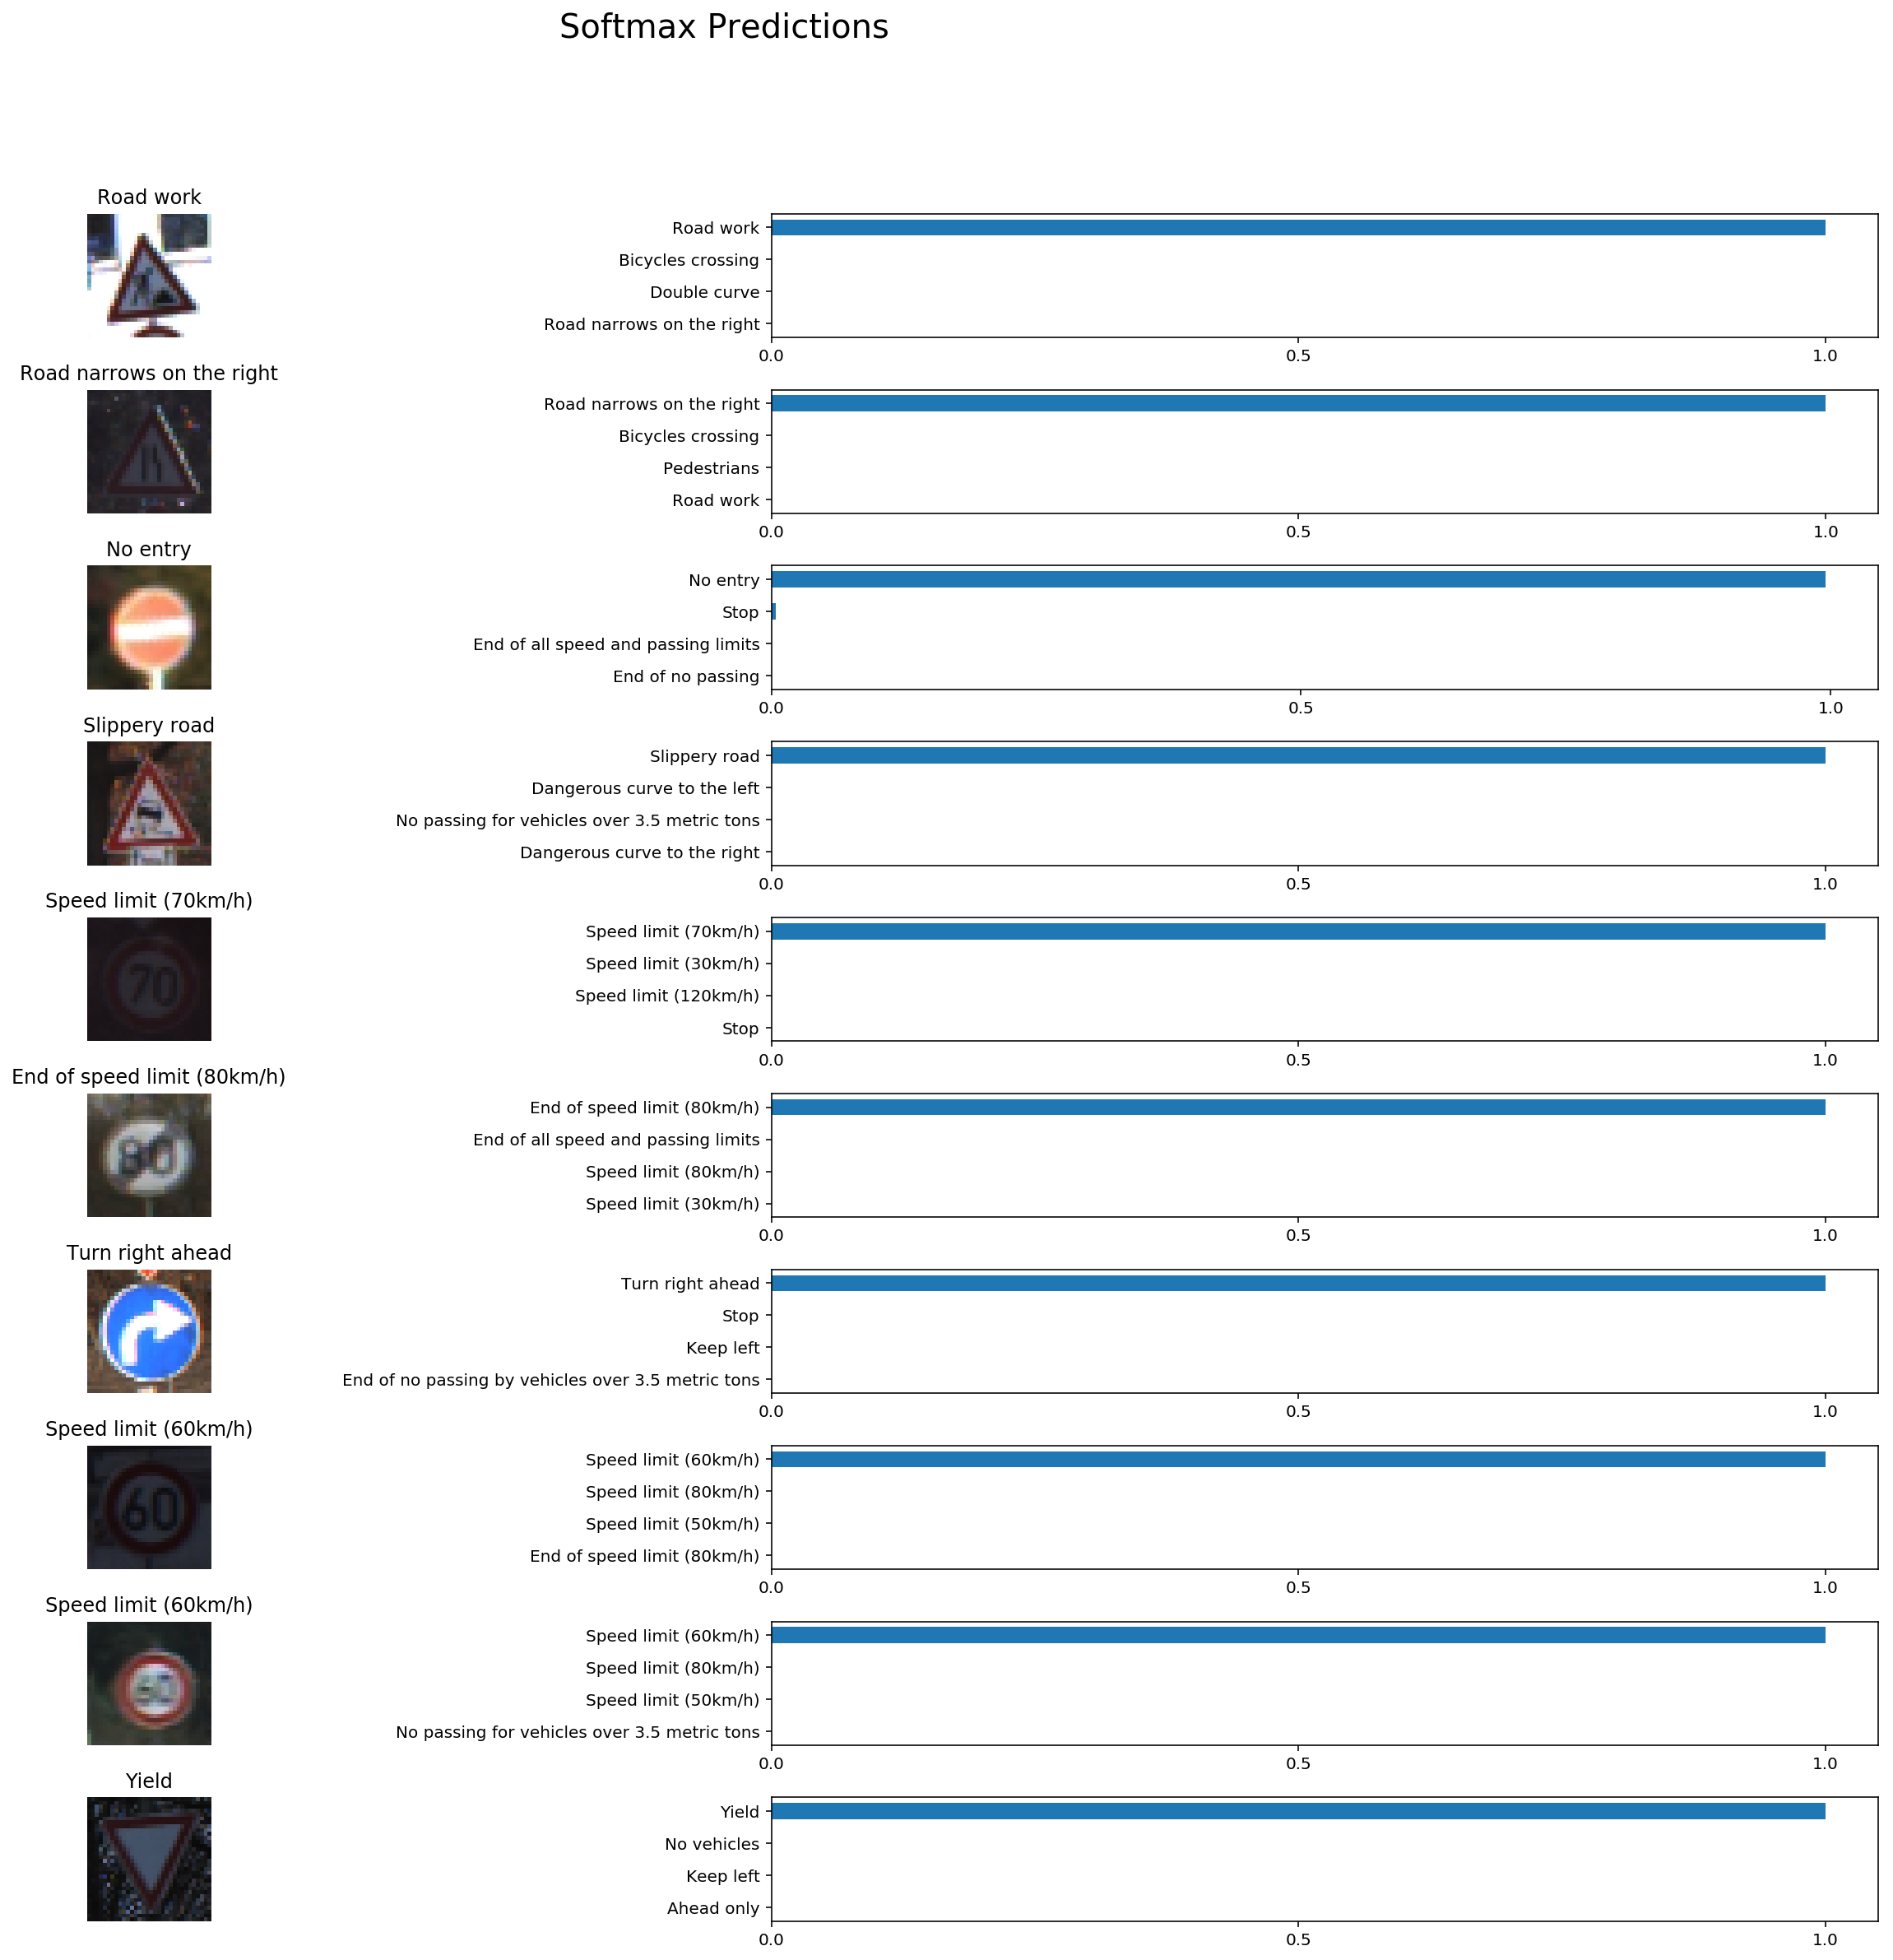

In [99]:
LN2_path_name = './examples/plot_LN2_pred.png'
plot_pred(LN2_indices, LN2_prediction, LN2_path_name)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [100]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import glob
import cv2
import matplotlib.image as mpimg
images_path = glob.glob('examples/*_t.jpeg')

In [101]:
images_path

['examples/image3_t.jpeg',
 'examples/image10_t.jpeg',
 'examples/image6_t.jpeg',
 'examples/image7_t.jpeg',
 'examples/image9_t.jpeg',
 'examples/image4_t.jpeg',
 'examples/image1_t.jpeg',
 'examples/image2_t.jpeg',
 'examples/image8_t.jpeg',
 'examples/image5_t.jpeg']

In [102]:
# resize image to 32X32
def resize_img(img):
    re_img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_CUBIC)
    re_img = cv2.cvtColor(re_img, cv2.COLOR_BGR2RGB)
    return re_img

In [103]:
test_imgs_RGB = np.array([resize_img(cv2.imread(path)) for path in images_path])
reshape_imgs_RGB = np.reshape(test_imgs_RGB, newshape=(2,5,32,32,3))

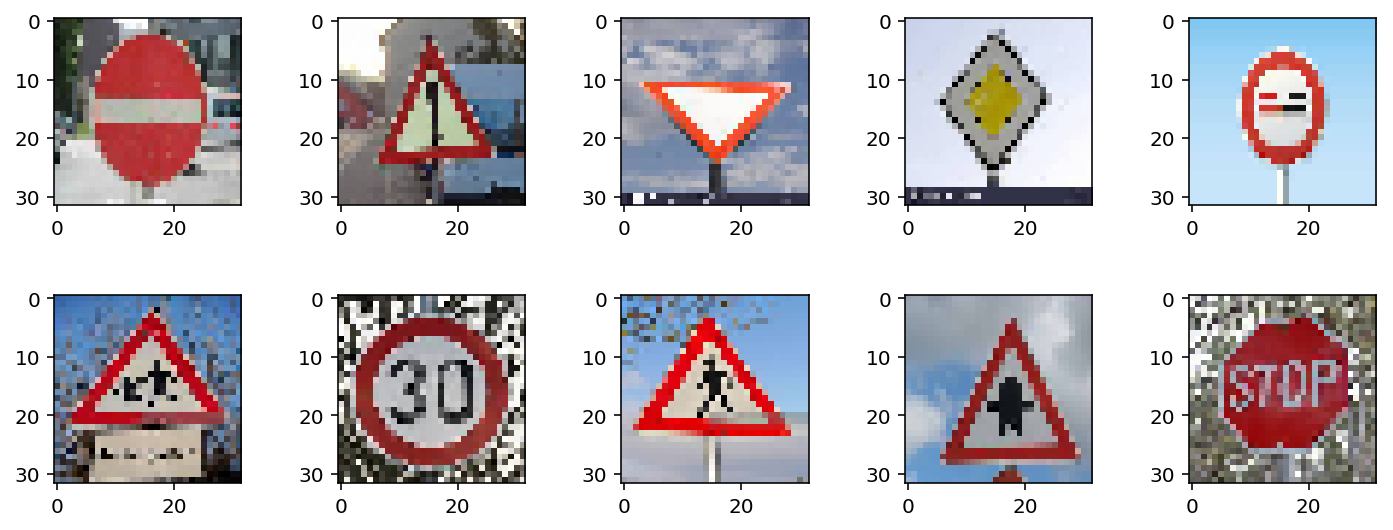

In [104]:
fig, axis = plt.subplots(nrows=2, ncols=5, figsize = (10,4))
fig.tight_layout()
for r in range(2):
    for c in range(5):
        axis[r][c].imshow(reshape_imgs_RGB[r][c]/256)
fig.savefig('./examples/show_web_images.png')  

### Predict the Sign Type for Each Image

In [105]:
# grayscale and normalize images
test_imgs_GRAY = normalize(grayscale(test_imgs_RGB))

In [106]:
n_sample = len(test_imgs_GRAY)
n_top_probability = 5

In [107]:
def web_imgs_predict(savefile, tensor_names):
    load_graph = tf.Graph()
    with tf.Session(graph=load_graph) as sess:
        loader = tf.train.import_meta_graph(savefile + '.meta')
        loader.restore(sess, savefile)
        
        #Tensor loaded
        loaded_x = load_graph.get_tensor_by_name('X-input:0')
        loaded_y = load_graph.get_tensor_by_name('y-label:0')
        loaded_keep_prob = load_graph.get_tensor_by_name('keep_prob:0')
        #####
        loaded_logits = load_graph.get_tensor_by_name(tensor_names[0])
        #loaded_accuracy = load_graph.get_tensor_by_name(tensor_names[1])
        
        
        #random_imgs = np.array(X_test[i] for i in indices) 
        prediction = tf.nn.softmax(loaded_logits)
        top_k = tf.nn.top_k(prediction, n_top_probability)
        img_prediction = sess.run(top_k, feed_dict={
            loaded_x:test_imgs_GRAY, loaded_keep_prob:1})
        return img_prediction

In [108]:
def web_imgs_plot_pred(prediction):
    signName = traffic_sign_df['SignName'].values
    ind = np.arange(n_top_probability)
    margin = 0.5
    width = 0.5
    
    fig, axies = plt.subplots(nrows=n_sample, ncols=2, figsize=(20,1.5*n_sample))
    fig.tight_layout()
    fig.suptitle('Softmax Predictions', fontsize=20, y=1.1)
    
    for i in range(n_sample):
        pred_values = prediction.values[i]
        #correct_name = signName[y_test[indices[i]]]
        pred_names = [signName[ids] for ids in prediction.indices[i]]
        
        axies[i][0].imshow(test_imgs_RGB[i])
        axies[i][0].set_axis_off()
        
        #axies[i][0].imshow(X_test[indices[i]])
        #axies[i][0].set_title(correct_name)
        
        
        axies[i][1].barh(ind + margin, pred_values[::-1], width)
        axies[i][1].set_yticks(ind + margin)
        axies[i][1].set_yticklabels(pred_names[::-1])
        axies[i][1].set_xticks([0, 0.5, 1.0])
    fig.savefig('./examples/plot_web_img_pred.png')

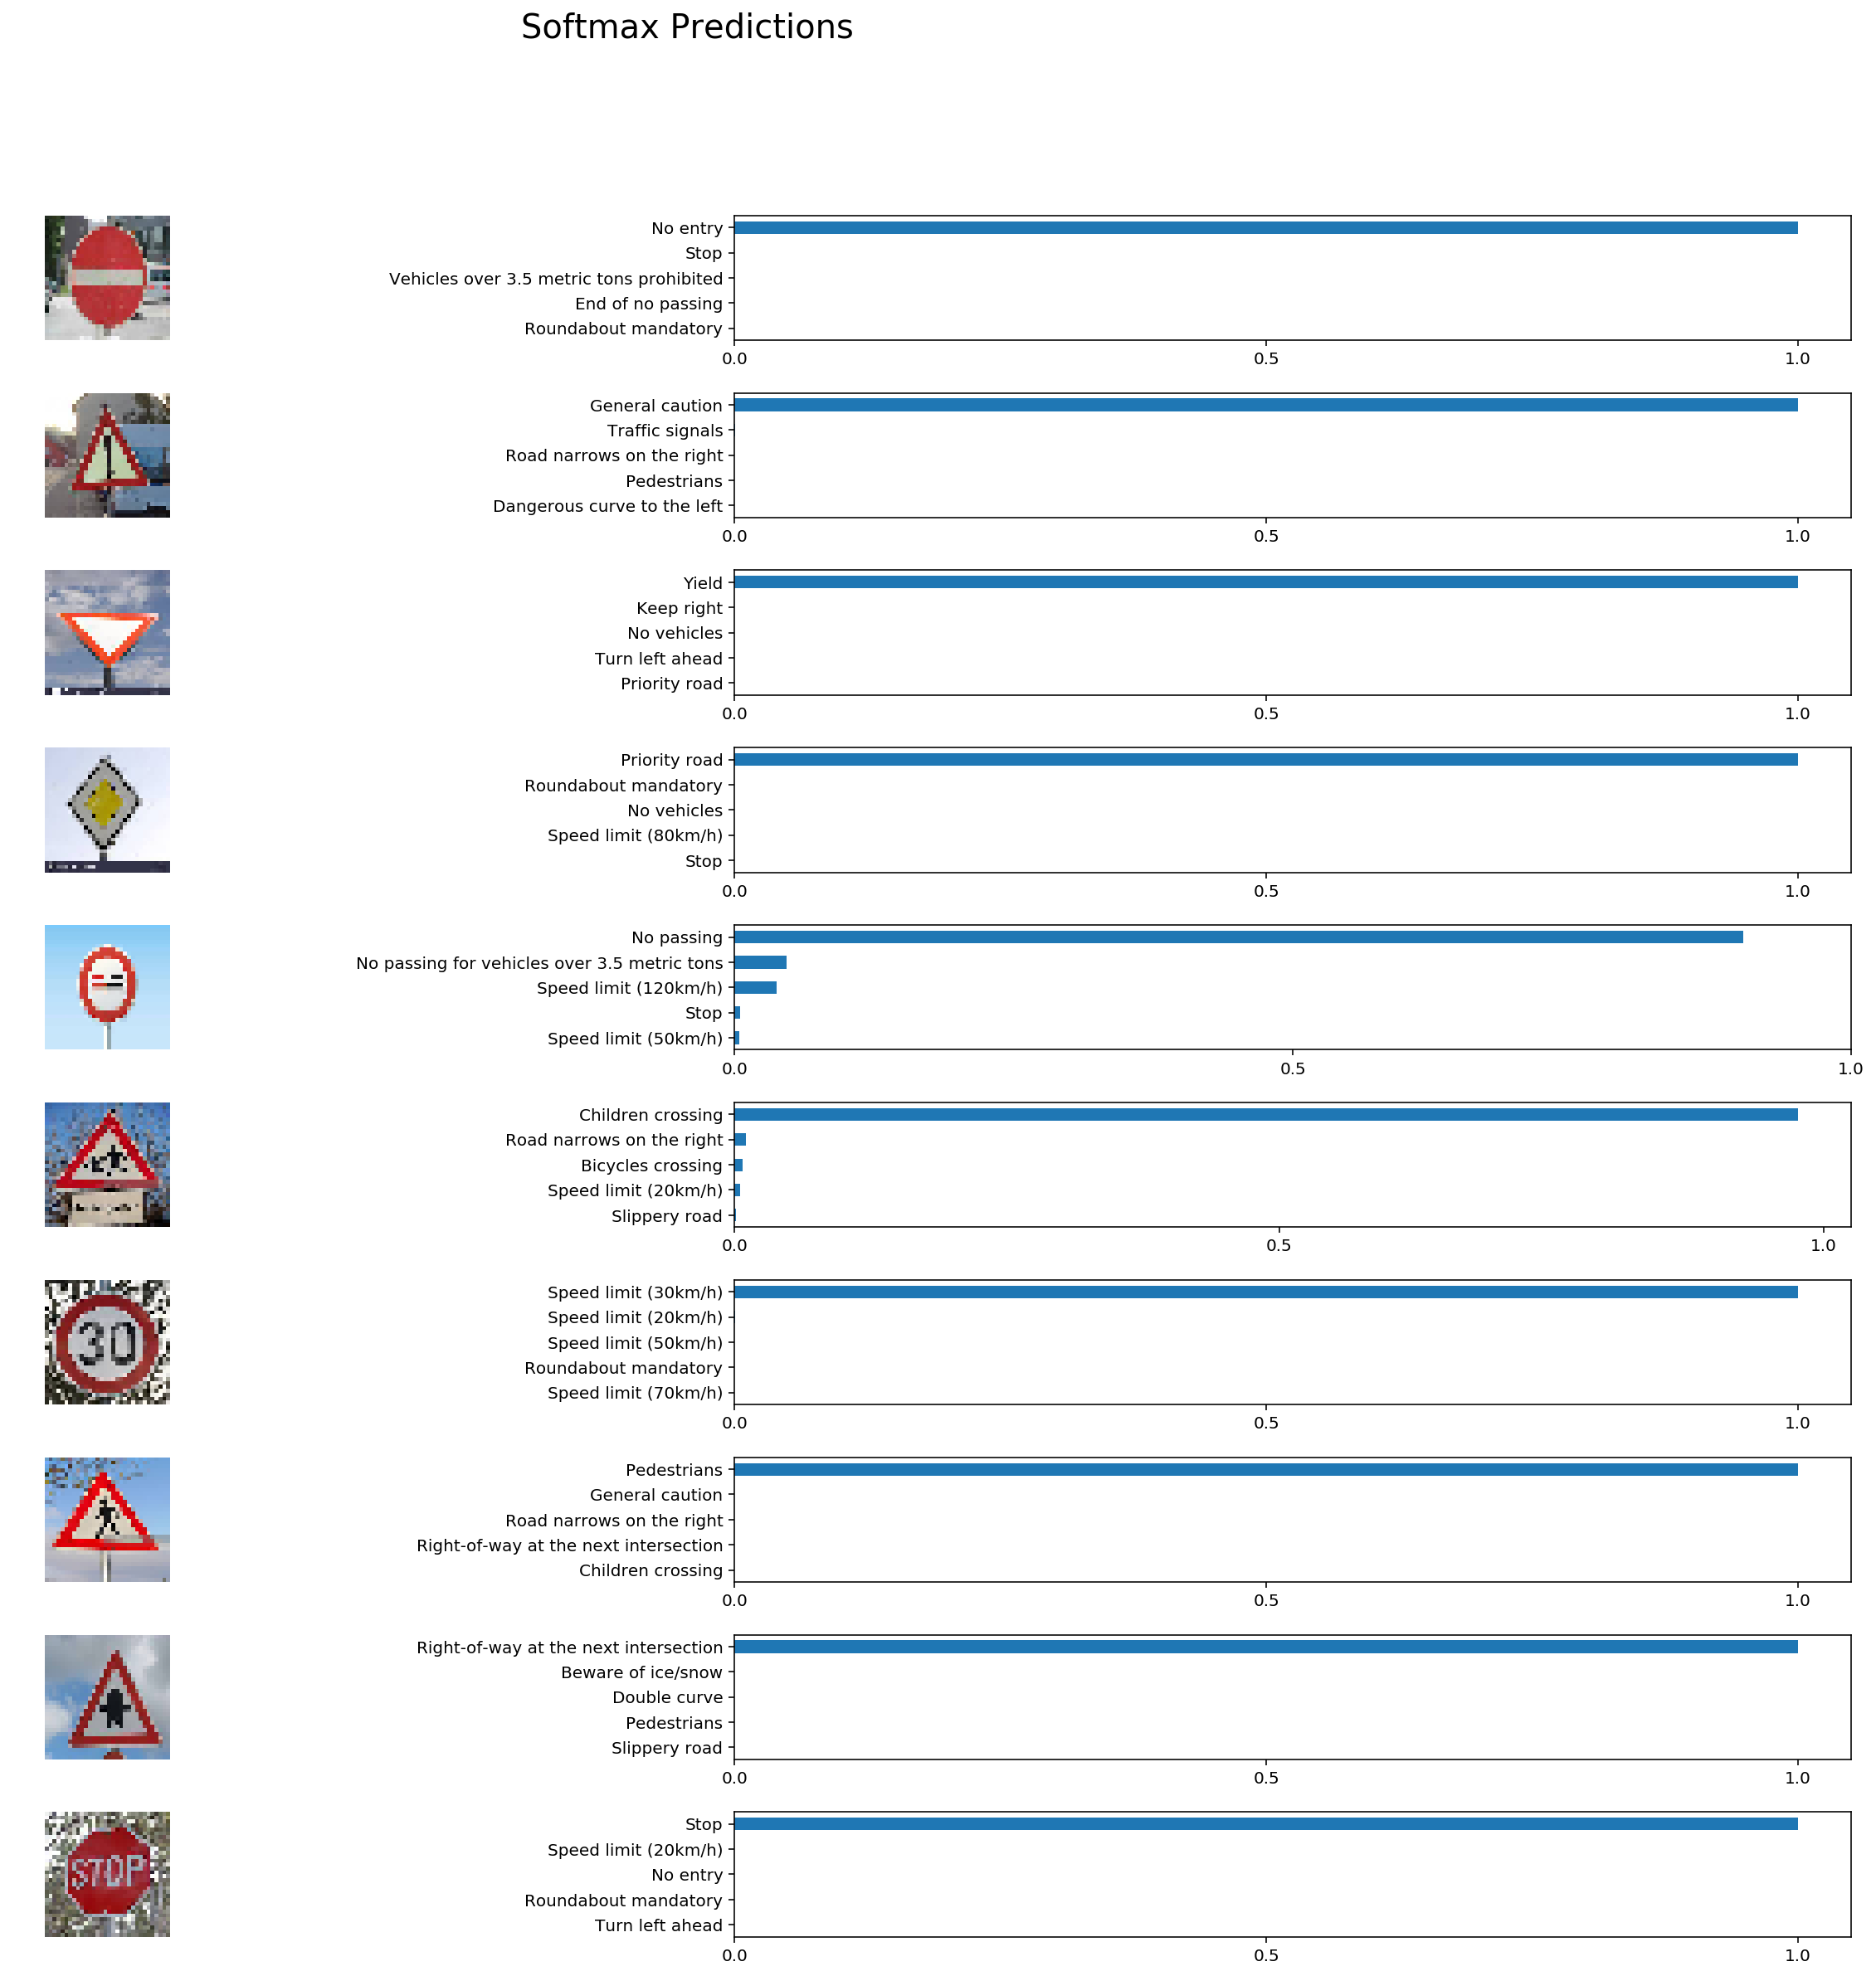

In [109]:
imgs_pred = web_imgs_predict(LeNet_E_savefile, tensor_names)
web_imgs_plot_pred(imgs_pred)

### Analyze Performance

In [110]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [111]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [120]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, path_name, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={X : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
    plt.savefig(path_name)
    

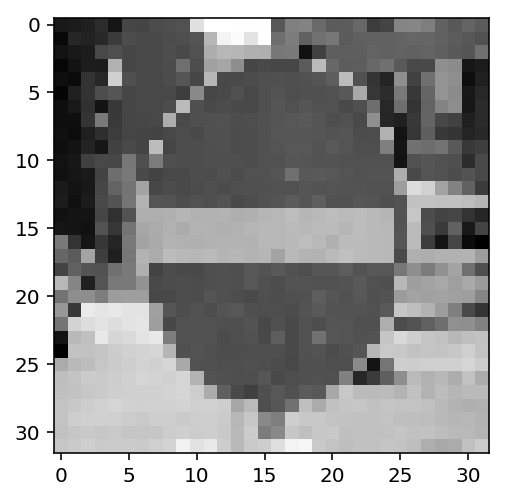

In [121]:
test_img_ana = test_imgs_GRAY[0:1]
test_img_show = test_imgs_GRAY[0].squeeze()
plt.imshow(test_img_show, cmap='gray')
plt.savefig('./examples/test_ana_img.png')

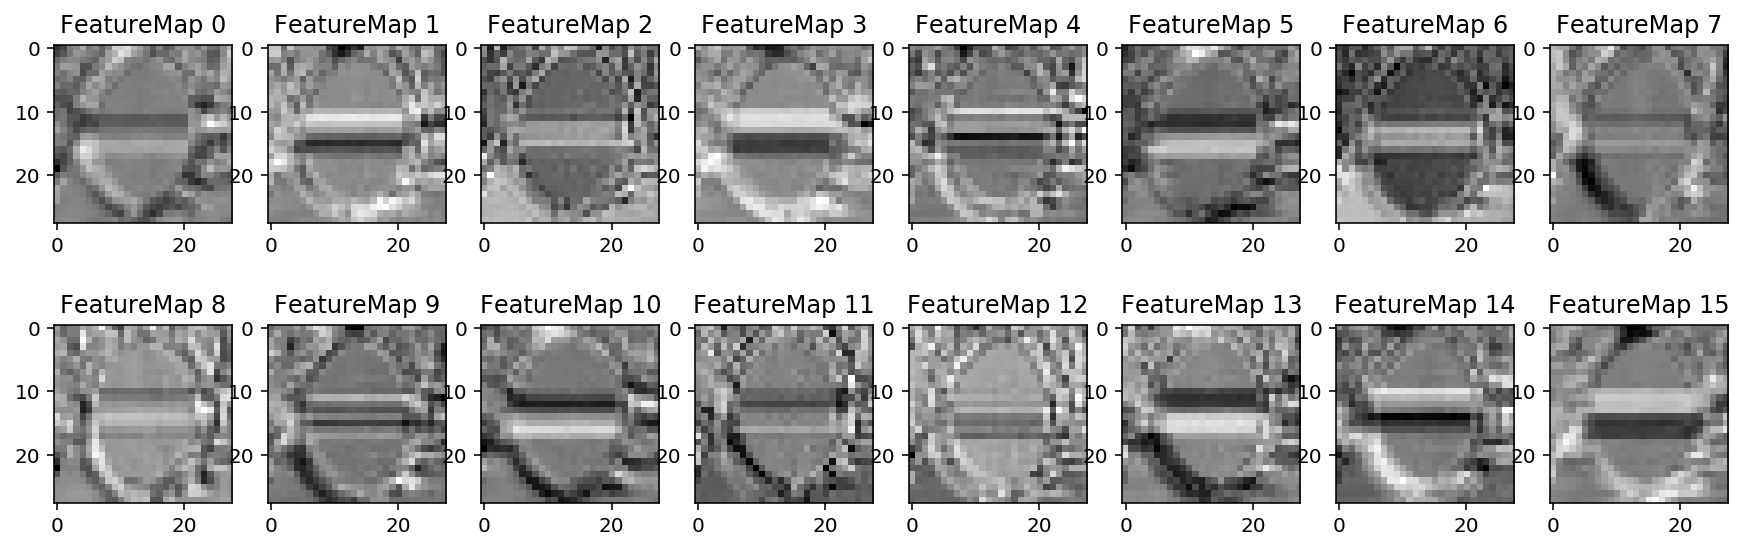

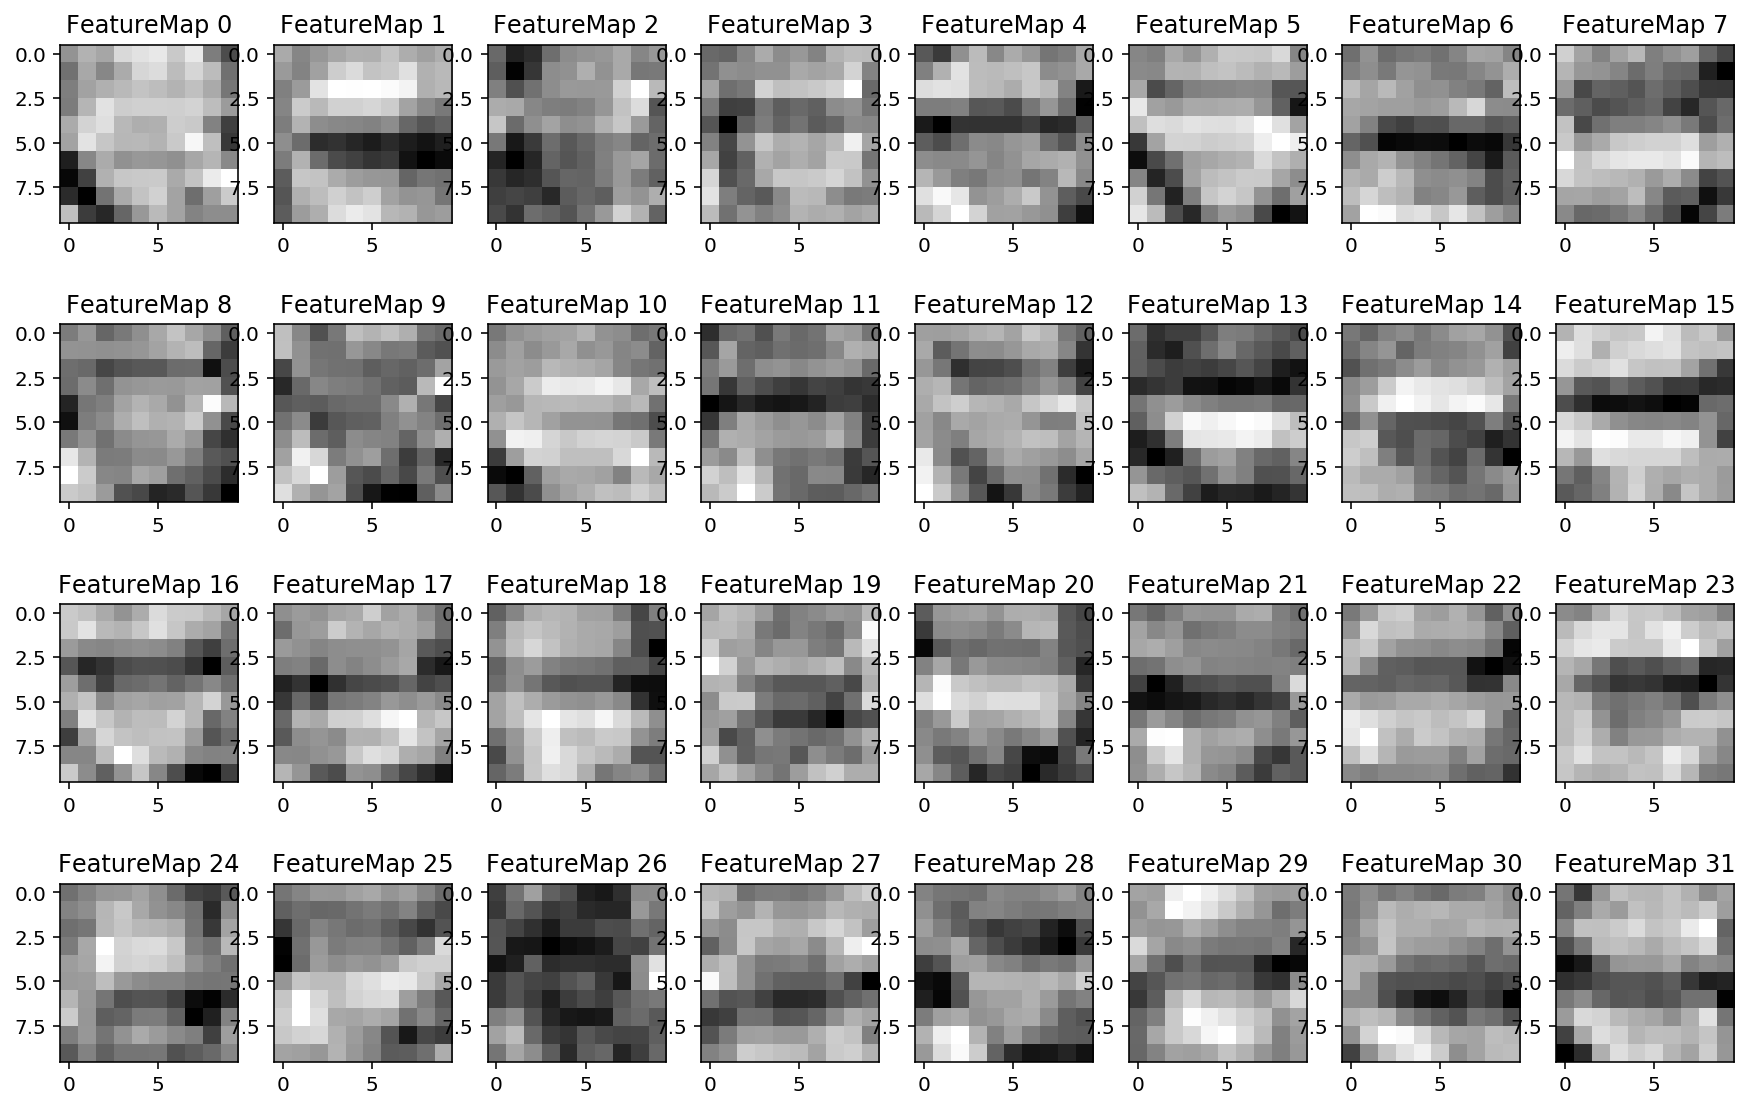

In [122]:
with tf.Session() as sess:
    new_saver = tf.train.import_meta_graph('./check_point_LeNet_E/LNE_check_point.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./check_point_LeNet_E/.'))
    conv_1 = tf.get_default_graph().get_tensor_by_name('conv_layer_2:0')
    conv_2 = tf.get_default_graph().get_tensor_by_name('conv_layer_3:0')
    conv_3 = tf.get_default_graph().get_tensor_by_name('conv_layer_4:0')
    conv_4 = tf.get_default_graph().get_tensor_by_name('conv_layer_5:0')
    analyze_imgs_path1 = './examples/analyze_img1.png'
    outputFeatureMap(test_img_ana, conv_1, analyze_imgs_path1, plt_num=1)
    analyze_imgs_path2 = './examples/analyze_img2.png'
    outputFeatureMap(test_img_ana, conv_3, analyze_imgs_path2, plt_num=2)